This notebook takes the geoROC datasets and filters them in series of steps before compiling this data with our models and Yasur data.

In [1]:
import pandas as pd
import numpy as np
import os
from os.path import splitext, basename
import shutil
import glob

In [2]:
os.path.abspath('')

'/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FullModel'

In [3]:
# read in several whole rock csvs
files = os.listdir('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Databases/GEOROC/WholeRock')

In [5]:
# copy these csv files to this workding dir
#for files in glob.glob(os.path.join('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Databases/GEOROC/WholeRock', '*.*')):
 #   shutil.copy(files,os.path.abspath(''))

In [6]:
# The function find_csv_filenames() returns a list of filenames as strings
# in the directory path_to_dir with the given suffix (by default, ".csv").
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = os.listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]


In [7]:
rawfile = find_csv_filenames(os.path.abspath('')) #("my/directory")
for name in rawfile:
    print(name)

KAMCHATKA_ARC.csv
LUZON_ARC.csv
IZU_BONIN_ARC.csv
MARIANAS_ARC.csv
VANUATU_ARC.csv
TONGA_ARC.csv
HONSHU_ARC.csv
LESSER_ANTILLES_ARC.csv
BANDA_ARC.csv
ALEUTIAN_ARC.csv
NEW_ZEALAND_ARC.csv
CENTRAL_AMERICAN_ARC.csv
ANDEAN_ARC.csv
CASCADES_ARC.csv
BISMARCK_ARC.csv
AEGEAN_ARC.csv
KERMADEC_ARC.csv
SUNDA_ARC.csv
MEXICAN_ARC.csv


In [8]:
os.path.abspath('')

'/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FullModel'

In [9]:
dfs = {splitext(basename(fp))[0].split('_')[0] : pd.read_csv('../FullModel/{}'.format(fp),error_bad_lines=False,encoding = 'Latin-1') for fp in rawfile}
print (dfs.keys())

/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (0,28,31,33) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (0,18,23,27,28,31,32,33,35) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (28,31,36) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (0,18,22,23,25,26,28,29,30,31,32,34) have mixed types.Specify dtype option on import or set low_memo

dict_keys(['KAMCHATKA', 'LUZON', 'IZU', 'MARIANAS', 'VANUATU', 'TONGA', 'HONSHU', 'LESSER', 'BANDA', 'ALEUTIAN', 'NEW', 'CENTRAL', 'ANDEAN', 'CASCADES', 'BISMARCK', 'AEGEAN', 'KERMADEC', 'SUNDA', 'MEXICAN'])


/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (0,3,18,27,28,31,32,33,35,37,71,78) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [10]:
dfs['KAMCHATKA'].head() #checking to see if the duplicate headers have gone

,Year,CITATION,SAMPLE NAME,UNIQUE_ID,LOCATION,LOCATION COMMENT,LATITUDE (MIN.),LONGITUDE (MIN.),LATITUDE (MAX.),LONGITUDE (MAX.),...,CO2(PPM),H2O(PPM),ND143_ND144,SM147_ND144,SR87_SR86,PB206_PB204,PB208_PB204,HF176_HF177,AGE(KA),AGE(MA)
0,1994,[1304] CHABAUX F. (1994),samp. AZ29148,NaN,KAMCHATKA ARC / KAMCHATKA ARC / CENTRAL KAMCHA...,EASTERN VOLCANIC FRONT,53.256,158.836,53.256,158.836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1994,[1304] CHABAUX F. (1994),samp. T1475,7866-T1475/1975,KAMCHATKA ARC / KAMCHATKA ARC / CENTRAL KAMCHA...,CENTRAL KAMCHATKA DEPRESSION,55.530,160.270,55.700,160.270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1994,[1304] CHABAUX F. (1994),samp. K56P66,7983-K56P66,KAMCHATKA ARC / KAMCHATKA ARC / CENTRAL KAMCHA...,NaN,56.050,160.630,56.050,160.630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1994,[1304] CHABAUX F. (1994),samp. T1475,7866-T1475/1975,KAMCHATKA ARC / KAMCHATKA ARC / CENTRAL KAMCHA...,CENTRAL KAMCHATKA DEPRESSION,55.530,160.270,55.700,160.270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998,[2195] TURNER SIMON P. (1998),samp. J4688,7852-J4688,KAMCHATKA ARC / KAMCHATKA ARC / CENTRAL KAMCHA...,EASTERN VOLCANIC FRONT,55.170,160.530,55.170,160.530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# inspect each key:value pair (each individual dataframe)
csvs = list(dfs.keys())
#for i in csvs:
    #print(i)
    #print(dfs[i].columns)
    #print(len(dfs[i].columns))

In [12]:
# manipulating column headings
cols = []

print(cols)

for i in csvs:
    #print(dfs[i].columns) #columns for each dict value (df unique)
    dfs[i].columns = dfs[i].columns.str.strip().str.replace(' ', '_').\
    str.replace('(WT%)','').str.replace('(','').str.replace(')','').str.replace('.','').\
    str.replace('PPM','_ppm').str.replace('PPB', '_ppb')
    lst = list(dfs[i].columns)
    cols.append(lst)

[]


<ipython-input-12-986b5d63b193>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs[i].columns = dfs[i].columns.str.strip().str.replace(' ', '_').\
<ipython-input-12-986b5d63b193>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dfs[i].columns = dfs[i].columns.str.strip().str.replace(' ', '_').\


In [13]:
len(lst)#number of columns

138

In [14]:
csvs

['KAMCHATKA',
 'LUZON',
 'IZU',
 'MARIANAS',
 'VANUATU',
 'TONGA',
 'HONSHU',
 'LESSER',
 'BANDA',
 'ALEUTIAN',
 'NEW',
 'CENTRAL',
 'ANDEAN',
 'CASCADES',
 'BISMARCK',
 'AEGEAN',
 'KERMADEC',
 'SUNDA',
 'MEXICAN']

In [15]:
# add new column matching dfs.keys
split_loc = []
for i in csvs:
    splitter = dfs[i].LOCATION.str.split("/", expand = True )
    dfs[i].loc[:,'arc_name'] = splitter[0]
    dfs[i].loc[:,'loc2'] = splitter[1]
    dfs[i].loc[:,'loc3'] = splitter[2]
    #dfs[i].loc[:,'loc4'] = splitter[3]
    lst=list(dfs[i].columns)
    split_loc.append(lst)

In [16]:
# filter columns raising errors 
len(split_loc[0]), len(split_loc[1]),len(split_loc[2]),len(split_loc[15])

(138, 128, 132, 114)

In [17]:
dfall = pd.DataFrame()
for key in dfs:
    location = dfs[key] #dataframe per location/key
    dfall = dfall.append(location, ignore_index=True)
    
    print(key, location.shape)

KAMCHATKA (11981, 138)
LUZON (4146, 128)
IZU (19006, 132)
MARIANAS (6636, 133)
VANUATU (3532, 119)
TONGA (8329, 133)
HONSHU (26968, 123)
LESSER (8535, 123)
BANDA (1057, 93)
ALEUTIAN (8192, 122)
NEW (11457, 122)
CENTRAL (11256, 126)
ANDEAN (37252, 137)
CASCADES (14531, 127)
BISMARCK (4223, 125)
AEGEAN (4842, 114)
KERMADEC (2037, 104)
SUNDA (5990, 127)
MEXICAN (16955, 141)


In [18]:
dfall.head() #should have max 141 columns but returning 166 suggesting the
#files read in did not have exactly the same column structure.

,Year,CITATION,SAMPLE_NAME,UNIQUE_ID,LOCATION,LOCATION_COMMENT,LATITUDE_MIN,LONGITUDE_MIN,LATITUDE_MAX,LONGITUDE_MAX,...,RU_ppm,BR_ppb,BA_ppb,BAO,HF_ppm,AGEYEARS_BP,ZN_ppb,AS_ppb,SB_ppb,CE_ppb
0,1994,[1304] CHABAUX F. (1994),samp. AZ29148,NaN,KAMCHATKA ARC / KAMCHATKA ARC / CENTRAL KAMCHA...,EASTERN VOLCANIC FRONT,53.256,158.836,53.256,158.836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1994,[1304] CHABAUX F. (1994),samp. T1475,7866-T1475/1975,KAMCHATKA ARC / KAMCHATKA ARC / CENTRAL KAMCHA...,CENTRAL KAMCHATKA DEPRESSION,55.530,160.27,55.700,160.270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1994,[1304] CHABAUX F. (1994),samp. K56P66,7983-K56P66,KAMCHATKA ARC / KAMCHATKA ARC / CENTRAL KAMCHA...,NaN,56.050,160.63,56.050,160.630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1994,[1304] CHABAUX F. (1994),samp. T1475,7866-T1475/1975,KAMCHATKA ARC / KAMCHATKA ARC / CENTRAL KAMCHA...,CENTRAL KAMCHATKA DEPRESSION,55.530,160.27,55.700,160.270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998,[2195] TURNER SIMON P. (1998),samp. J4688,7852-J4688,KAMCHATKA ARC / KAMCHATKA ARC / CENTRAL KAMCHA...,EASTERN VOLCANIC FRONT,55.170,160.53,55.170,160.530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#export unfiltered data into a different folder otherwise it will be read with all the raw data
dfall.to_csv('../FullModel/filtered/globalarc_wr.csv')

In [20]:
x = []
for i in dfs.keys():
    print(i,dfs[i].shape,dfs[i].dtypes.value_counts())

KAMCHATKA (11981, 138) float64    109
object      29
dtype: int64
LUZON (4146, 128) float64    100
object      27
int64        1
dtype: int64
IZU (19006, 132) float64    103
object      29
dtype: int64
MARIANAS (6636, 133) float64    103
object      30
dtype: int64
VANUATU (3532, 119) float64    90
object     28
int64       1
dtype: int64
TONGA (8329, 133) float64    104
object      29
dtype: int64
HONSHU (26968, 123) object     68
float64    55
dtype: int64
LESSER (8535, 123) float64    94
object     28
int64       1
dtype: int64
BANDA (1057, 93) float64    67
object     25
int64       1
dtype: int64
ALEUTIAN (8192, 122) float64    93
object     29
dtype: int64
NEW (11457, 122) float64    90
object     31
int64       1
dtype: int64
CENTRAL (11256, 126) float64    96
object     30
dtype: int64
ANDEAN (37252, 137) float64    108
object      28
int64        1
dtype: int64
CASCADES (14531, 127) float64    97
object     30
dtype: int64
BISMARCK (4223, 125) float64    97
object     27
int64

In [21]:
dfall.columns

Index(['Year', 'CITATION', 'SAMPLE_NAME', 'UNIQUE_ID', 'LOCATION',
       'LOCATION_COMMENT', 'LATITUDE_MIN', 'LONGITUDE_MIN', 'LATITUDE_MAX',
       'LONGITUDE_MAX',
       ...
       'RU_ppm', 'BR_ppb', 'BA_ppb', 'BAO', 'HF_ppm', 'AGEYEARS_BP', 'ZN_ppb',
       'AS_ppb', 'SB_ppb', 'CE_ppb'],
      dtype='object', length=166)

In [22]:
import matplotlib.pyplot as plt

In [23]:
col_2_fl = dfall.columns[41:130] #list of columns to convert to floats

dfall[col_2_fl] = dfall[col_2_fl].apply(pd.to_numeric, errors='coerce') #converting to floats

In [24]:
dfall['MGO'].dtype, dfall['MGO'].min(), dfall['MGO'].max()

(dtype('float64'), -0.001199858, 50.11)

In [25]:
# Acceptable upper limit of primitive arc magmas
dfall_prim = dfall[dfall['MGO'] < 20]
dfall_prim.shape,dfall_prim['MGO'].dtype, dfall_prim['MGO'].min(), dfall_prim['MGO'].max()

((88179, 166), dtype('float64'), -0.001199858, 19.99)

In [26]:
dfall['CU'].nunique()

28

In [27]:
dfall_prim['CU'].min(), dfall_prim['CU'].max(), dfall_prim['CU_ppm'].min(), dfall_prim['CU_ppm'].max()
# i think the forced 0 is skewing this data:
dfall_prim.loc[:,'CU_wt%_na'] = dfall_prim['CU'].replace(0, np.nan)
dfall_prim.loc[:,'CU_ppm_na'] = dfall_prim['CU_ppm'].replace(0, np.nan)

/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [28]:
dfall_prim.loc[:,'CU_ppm_na'].count(), dfall_prim.loc[:,'CU_ppm_na'].nunique(), dfall_prim.shape

(13210, 1930, (88179, 168))

In [29]:
dfall_prim.loc[:,'AG_ppm'].count(), dfall_prim.loc[:,'AG_ppm'].nunique(), dfall_prim.shape

(140, 27, (88179, 168))

In [30]:
dfall_prim.loc[:,'AU_ppb'].count(), dfall_prim.loc[:,'AU_ppb'].nunique(), dfall_prim.shape

(23, 15, (88179, 168))

##### dfall_prim has n=13210 copper concs, n=140 Ag concs, n=3 Au in ppm and n=23 in ppb.

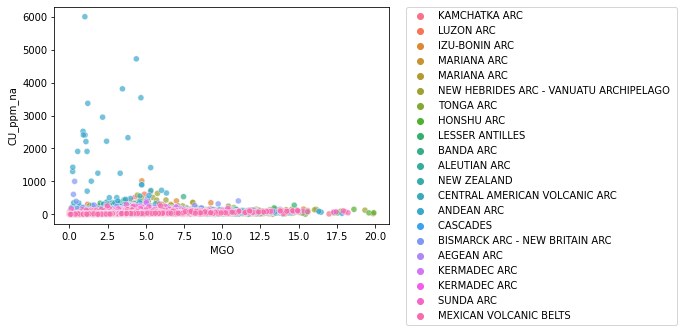

In [31]:
import seaborn as sns
sns.scatterplot(x=dfall_prim['MGO'], y=dfall_prim['CU_ppm_na'], hue=dfall_prim['arc_name'], alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


In [32]:
dfall[['H2O','H2OP','H2OM',]].head() #3 columns with H2O data 

,H2O,H2OP,H2OM
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


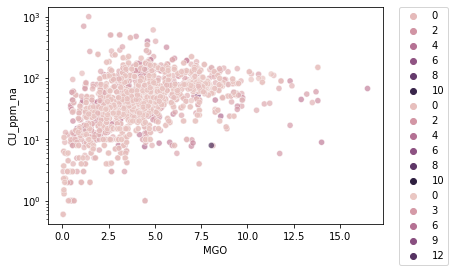

In [33]:
ax = sns.scatterplot(x=dfall_prim['MGO'], y=dfall_prim['CU_ppm_na'], hue=dfall_prim['H2O'], alpha=0.7)
ax = sns.scatterplot(x=dfall_prim['MGO'], y=dfall_prim['CU_ppm_na'], hue=dfall_prim['H2OP'], alpha=0.7)
ax = sns.scatterplot(x=dfall_prim['MGO'], y=dfall_prim['CU_ppm_na'], hue=dfall_prim['H2OM'], alpha=0.7)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_yscale('log')


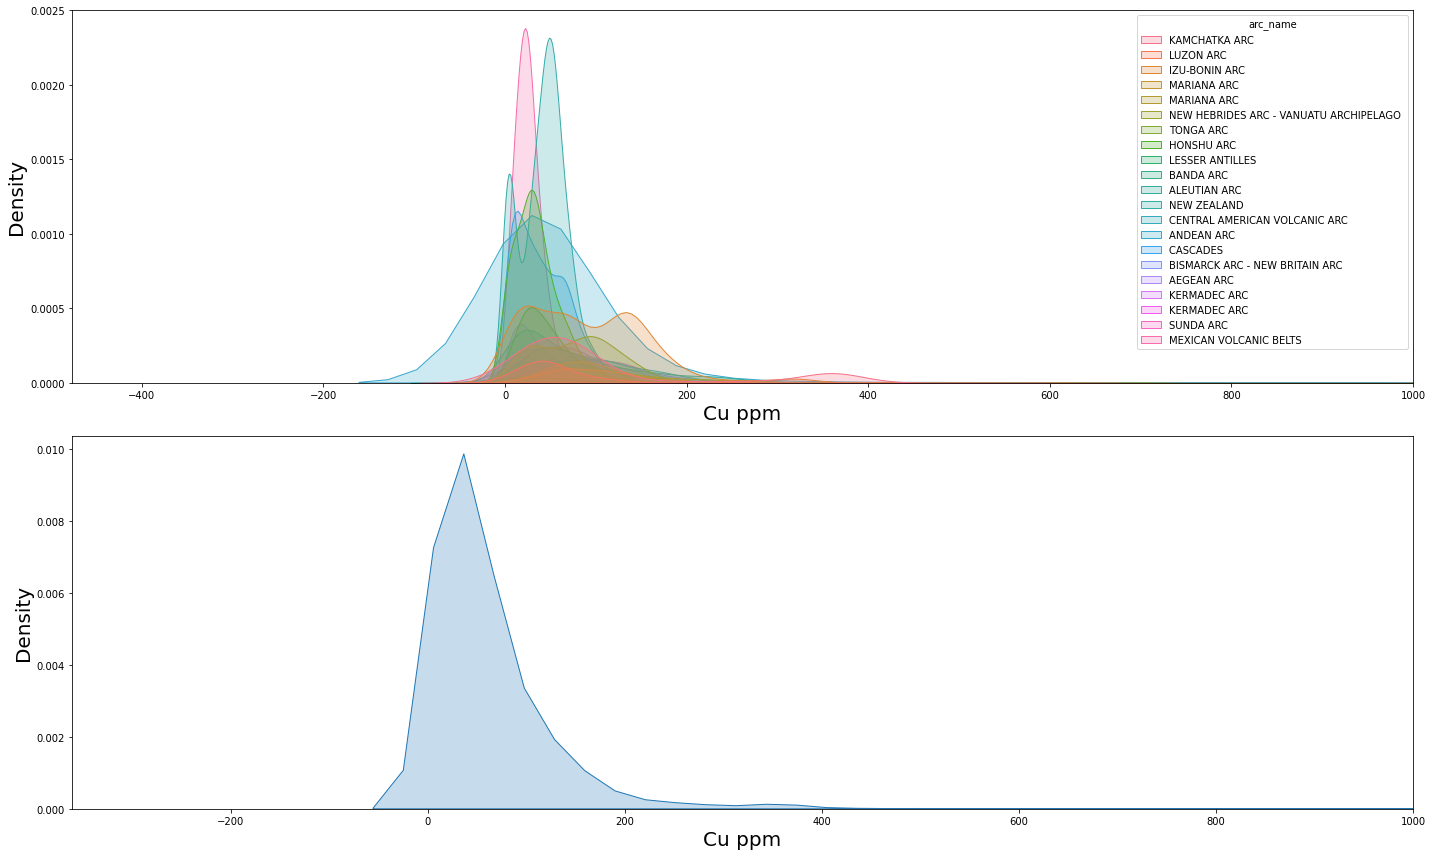

In [34]:
# WR data
fig, ax = plt.subplots(2,1,figsize=(20,12))
sns.kdeplot(data=dfall_prim, x='CU_ppm_na', hue='arc_name',fill=True, ax=ax[0])
sns.kdeplot(data=dfall_prim, x='CU_ppm_na', fill=True, ax=ax[1])

ax[0].set_xlim(None,1000)
ax[1].set_xlim(None,1000)


ax[0].set_xlabel('Cu ppm', fontsize=20)
ax[1].set_xlabel('Cu ppm', fontsize=20)

ax[0].set_ylabel('Density', fontsize=20)
ax[1].set_ylabel('Density', fontsize=20)

fig.tight_layout()


Filter data younger than 1960

In [35]:
year= dfall_prim["CITATION"].str.split("(", n = 1, expand = True)[1].str.split(")",n = 1, expand = True)[0]
dfall_prim.loc[:,'date'] = year
all_f1 = dfall_prim[~dfall_prim['date'].isin(['NO YEAR'])]
all_f1['date']=all_f1.date.astype(float)
all_f1 = all_f1[all_f1.date > 1960]

/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-35-f6a4572e5426>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [36]:
all_f1.shape, dfall_prim.shape, all_f1['CU_ppm_na'].min()

((87010, 169), (88179, 169), 0.1)

In [37]:
all_f1.loc[:,'CU_ppm_na'].count(), all_f1.loc[:,'CU_ppm_na'].nunique(), all_f1.shape

(13120, 1928, (87010, 169))

In [38]:
all_f1.loc[:,'AG_ppm'].count(), all_f1.loc[:,'AG_ppm'].nunique(), all_f1.shape

(140, 27, (87010, 169))

In [39]:
all_f1.loc[:,'AU_ppb'].count(), all_f1.loc[:,'AU_ppb'].nunique(), all_f1.shape

(23, 15, (87010, 169))

##### dfall_prim has n=12649 copper concs, n=140 Ag concs, n=3 Au in ppm and n=23 in ppb.

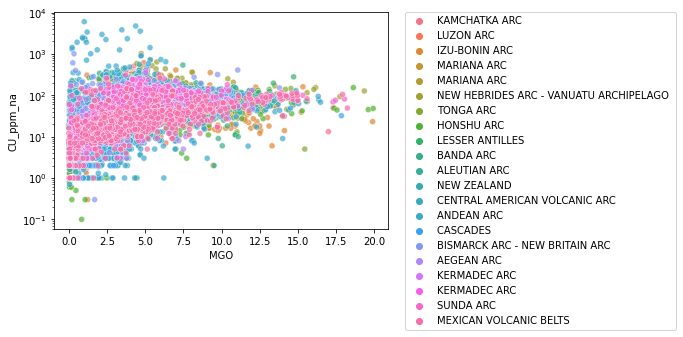

In [40]:
# check dtaa post DATE filtering:
ax = sns.scatterplot(x=all_f1['MGO'], y=all_f1['CU_ppm_na'], hue=all_f1['arc_name'], alpha=0.7)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_yscale('log')

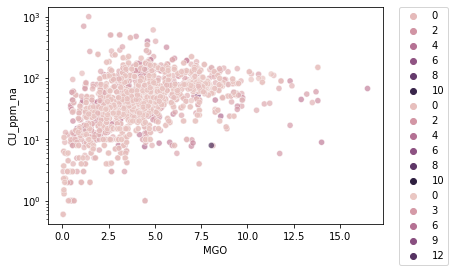

In [41]:

ax = sns.scatterplot(x=all_f1['MGO'], y=all_f1['CU_ppm_na'], hue=all_f1['H2O'], alpha=0.7)
ax = sns.scatterplot(x=all_f1['MGO'], y=all_f1['CU_ppm_na'], hue=all_f1['H2OP'], alpha=0.7)
ax = sns.scatterplot(x=all_f1['MGO'], y=all_f1['CU_ppm_na'], hue=all_f1['H2OM'], alpha=0.7)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_yscale('log')

Filter 2: drop rows where analytical method is not given

In [42]:
all_f1[all_f1['METHOD'].isin(['NOT GIVEN'])] #7321 rows to be dropped
all_f2 = all_f1[~all_f1['METHOD'].isin(['NOT GIVEN'])]

(-20.0, 600.0)

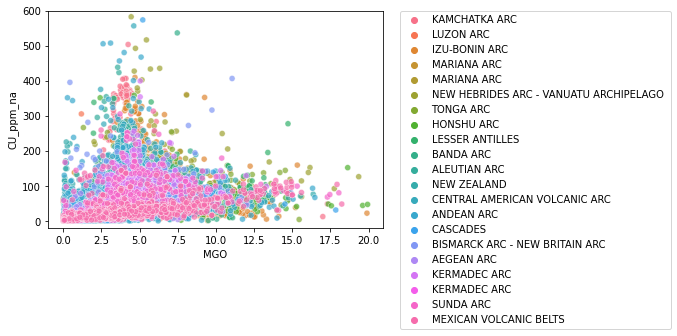

In [43]:
# data check after METHOD filter
ax = sns.scatterplot(x=all_f2['MGO'], y=all_f2['CU_ppm_na'], hue=all_f2['arc_name'], alpha=0.7)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#ax.set_yscale('log')
ax.set_ylim(-20,600)

(-20.0, 500.0)

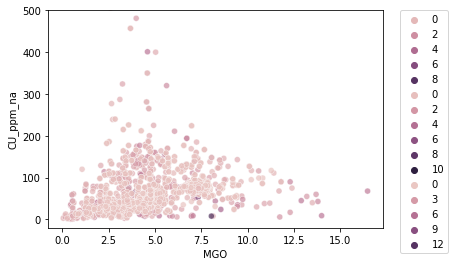

In [44]:
ax = sns.scatterplot(x=all_f2['MGO'], y=all_f2['CU_ppm_na'], hue=all_f2['H2O'], alpha=0.7)
ax = sns.scatterplot(x=all_f2['MGO'], y=all_f2['CU_ppm_na'], hue=all_f2['H2OP'], alpha=0.7)
ax = sns.scatterplot(x=all_f2['MGO'], y=all_f2['CU_ppm_na'], hue=all_f2['H2OM'], alpha=0.7)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#ax.set_yscale('log')
ax.set_ylim(-20,500)

(-20.0, 600.0)

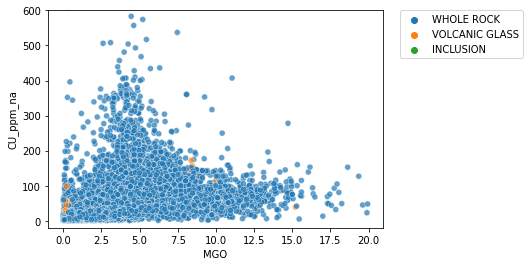

In [45]:
ax = sns.scatterplot(x=all_f2['MGO'], y=all_f2['CU_ppm_na'], hue=all_f2['TYPE_OF_MATERIAL'], alpha=0.7)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#ax.set_yscale('log')
ax.set_ylim(-20,600)

In [46]:
all_f2.loc[:,'CU_ppm_na'].count(), all_f2.loc[:,'CU_ppm_na'].nunique(), all_f2.shape

(11745, 1857, (77690, 169))

In [47]:
all_f2.loc[:,'AG_ppm'].count(), all_f2.loc[:,'AG_ppm'].nunique(), all_f2.shape

(121, 18, (77690, 169))

###### after all_f2 - n=11373 Cu; n=121 Ag; ...Au

Filter 4: add a column for arc crustal thickness

In [48]:
# Make dict depths taken from Chiaradia 2019 Zinc paper and ...:
thk_dict = {'KAMCHATKA ARC ': 24.6, 'LUZON ARC ':27.8 , 'IZU-BONIN ARC ':22, 'MARIANA ARC ':14.5,
       'MARIANA ARC': 14.5, 'NEW HEBRIDES ARC - VANUATU ARCHIPELAGO ':23,
       'TONGA ARC ':20, 'HONSHU ARC ':29.2, 'LESSER ANTILLES ':24.7, 'BANDA ARC ':35,
       'ALEUTIAN ARC ':37.5, 'NEW ZEALAND ':28.6, 'CENTRAL AMERICAN VOLCANIC ARC ':28,
       'ANDEAN ARC ':50, 'CASCADES ':38.8, 'BISMARCK ARC - NEW BRITAIN ARC ':22.5,
       'AEGEAN ARC ':28.2, 'KERMADEC ARC ':15, 'KERMADEC ARC':15, 'SUNDA ARC ':25,
       'MEXICAN VOLCANIC BELTS ':30.3}
# to amend:
# Sunda 20-30
# andean 40:70
# Yasur versus central Vanuatu arc

In [49]:
# apply dict to df and add as a column
all_f2.loc[:,'thicks_km'] = all_f2['arc_name'].map(thk_dict)

/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


(-20.0, 600.0)

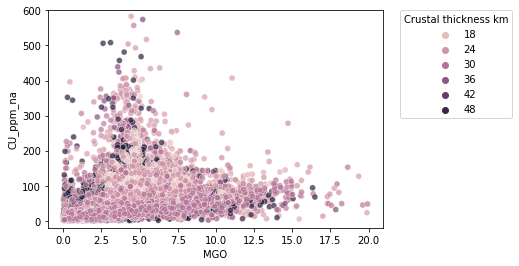

In [50]:
ax = sns.scatterplot(x=all_f2['MGO'], y=all_f2['CU_ppm_na'], hue=all_f2['thicks_km'], alpha=0.7)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Crustal thickness km')
#ax.set_yscale('log')
ax.set_ylim(-20,600)

In [51]:
# total population copper statistics 
Cu_mean = all_f2['CU_ppm_na'].mean()
Cu_mode= all_f2['CU_ppm_na'].mode()
Cu_med= all_f2['CU_ppm_na'].median()
Cu_mode, Cu_med, Cu_mean

(0    27.0
 dtype: float64,
 42.24852795,
 60.52088256031896)

In [52]:
# statistics by arc name:
Cu_gmean = all_f2.groupby(['arc_name'])['CU_ppm_na'].mean()
Cu_gmode = all_f2.groupby(['arc_name'])['CU_ppm_na'].agg(pd.Series.mode)
Cu_gmed = all_f2.groupby(['arc_name'])['CU_ppm_na'].median()
Cu_count = all_f2.groupby(['arc_name'])['CU_ppm_na'].count()

In [53]:
cu_stats = pd.DataFrame(columns=['ind','cu_gmean','cu_gmed','cu_gcount'])

for i in all_f2['arc_name'].unique():
    cu_g = all_f2[all_f2.arc_name == i]
    ind = cu_g.arc_name
    cu_stats['cu_gmean'] = cu_g['CU_ppm_na'].mean()
    cu_stats['cu_gmed'] = cu_g['CU_ppm_na'].median()
    cu_stats['cu_gcount'] = cu_g['CU_ppm_na'].count()
    
    

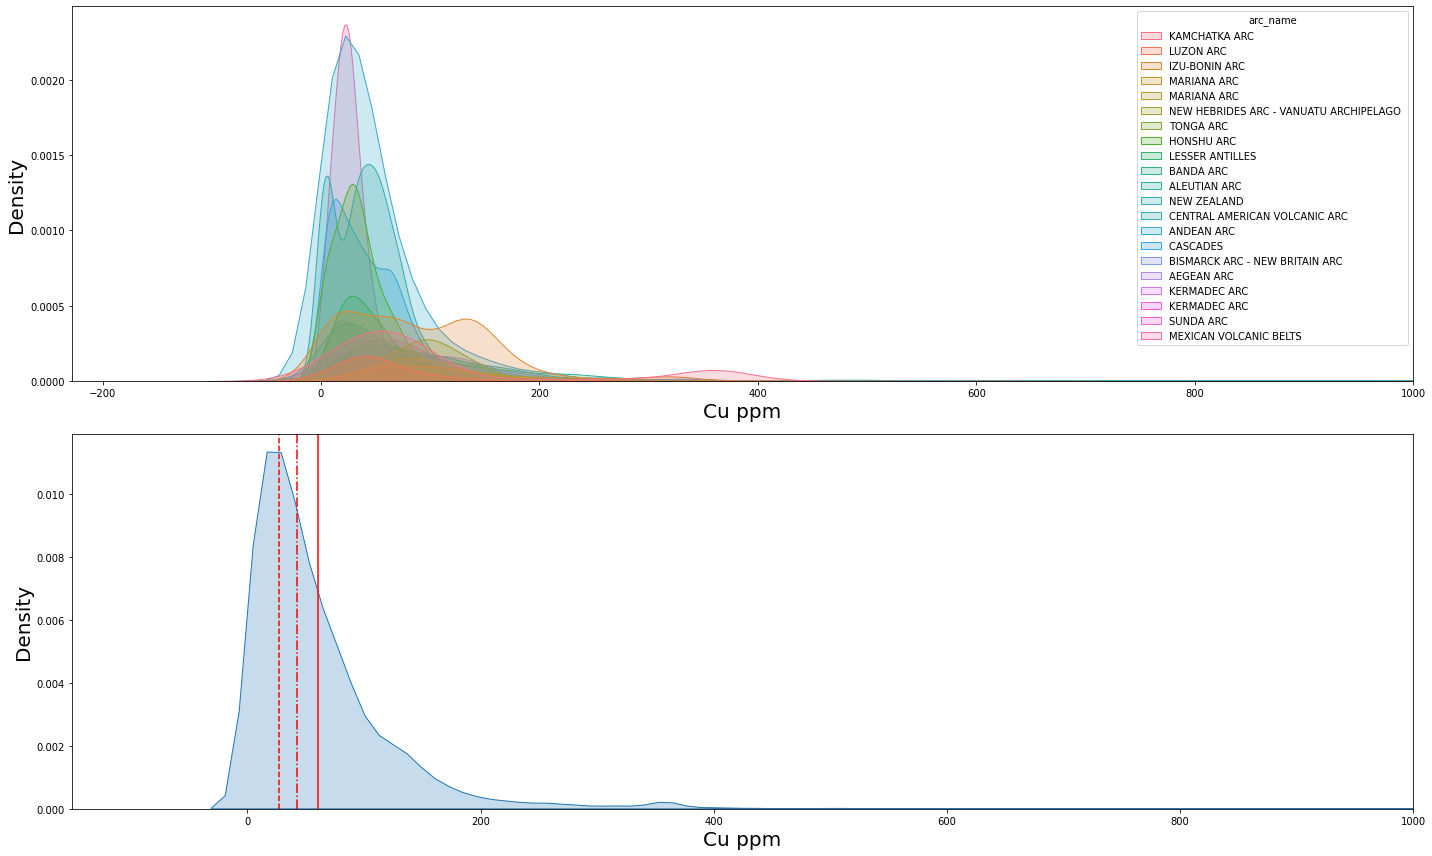

In [54]:
# WR data
fig, ax = plt.subplots(2,1,figsize=(20,12))
sns.kdeplot(data=all_f2, x='CU_ppm_na', hue='arc_name',fill=True, ax=ax[0])
sns.kdeplot(data=all_f2, x='CU_ppm_na', fill=True, ax=ax[1])

ax[0].set_xlim(None,1000)
ax[1].set_xlim(None,1000)


ax[0].set_xlabel('Cu ppm', fontsize=20)
ax[1].set_xlabel('Cu ppm', fontsize=20)

ax[0].set_ylabel('Density', fontsize=20)
ax[1].set_ylabel('Density', fontsize=20)

ax[1].axvline(Cu_mean, c='red')
ax[1].axvline(27, c='red', linestyle='--')
ax[1].axvline(Cu_med, c='red',linestyle='-.')

fig.tight_layout()


In [55]:
# ANOVA by arc name 
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

mod = ols('CU_ppm_na ~ arc_name', data = all_f2).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq       df           F  PR(>F)
arc_name  8.295916e+06     20.0  103.585552     0.0
Residual  4.695535e+07  11726.0         NaN     NaN


/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 18
  warnings.warn('covariance of constraints does not have full '


In [56]:
aov_table["PR(>F)"]

arc_name    0.0
Residual    NaN
Name: PR(>F), dtype: float64

In [57]:
pd.options.display.float_format = '{:.10f}'.format
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
aov_table['EtaSq'] = [esq_sm, 'NaN']
print(aov_table)

                      sum_sq               df              F       PR(>F)  \
arc_name  8295916.4376009488    20.0000000000 103.5855524581 0.0000000000   
Residual 46955349.3893947825 11726.0000000000            NaN          NaN   

                EtaSq  
arc_name 0.1501488937  
Residual          NaN  


In [58]:
aov_table.to_csv('../FullModel/filtered/ANOVA_arc_name.csv')

In [59]:
# ANOVA by H2O content

mod = ols('CU_ppm_na ~ H2O', data = all_f2).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
pd.options.display.float_format = '{:.10f}'.format
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
aov_table['EtaSq'] = [esq_sm, 'NaN']

In [60]:
aov_table.to_csv('../FullModel/filtered/ANOVA_h2o.csv')

In [61]:
# ANOVA by crustal thickness content

mod = ols('CU_ppm_na ~ thicks_km', data = all_f2).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
pd.options.display.float_format = '{:.10f}'.format
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
aov_table['EtaSq'] = [esq_sm, 'NaN']

In [62]:
aov_table.to_csv('../FullModel/filtered/ANOVA_thicks.csv')

#### Whole Rock interpretations
ANOVA performed to see if the differences in mean Cu with groups a. Arc name b. H2O content and c. thickness of arc crust are statistically significant. 

Ho = group means are equal, no variation
H1 = group means are different from each other

we should do assumption tests if we carry these results further: normla distribution, variance and independent variables. 

if P-value < 0.05 this means that there are significant differences between means of each group. 

In all ANOVA tests we find P-value << 0.05.

EtaSq < 3% means than variation in Cu is not described by the groups. 

Could this be a relfection of the data availability? H2O data quality are poor, especially in whole rock samples. 

Lets comapre the ANOVA text for the melt inclusion datasets. 

We could filter the WR data again for volcnaic samples only to improve the quality of H2O data. 

### Cu/Ag Cu/Au calculations for WR data

In [63]:
all_f2['CU_ppm_na'].count(),all_f2['AG_ppm'].count() #so max Cu/Ag we can have is 121

# lets screen a df for rows with Ag values
complete_ag = all_f2[~all_f2['AG_ppm'].isna()] #121 rows
cu_ag = complete_ag['CU_ppm_na'].div(complete_ag['AG_ppm'])
cu_ag = cu_ag.replace([np.inf, -np.inf], np.nan)

In [64]:
cu_ag.count() #still seing that only 29 data for cu/ag out of global data base.

# nick had alot more for Tonga and Papua New Guinea
complete_ag[complete_ag.arc_name.isin(['TONGA ARC '])] #this data have nothing for Tonga

,Year,CITATION,SAMPLE_NAME,UNIQUE_ID,LOCATION,LOCATION_COMMENT,LATITUDE_MIN,LONGITUDE_MIN,LATITUDE_MAX,LONGITUDE_MAX,...,HF_ppm,AGEYEARS_BP,ZN_ppb,AS_ppb,SB_ppb,CE_ppb,CU_wt%_na,CU_ppm_na,date,thicks_km


In [65]:
all_f2['AG_ppm'].unique()
all_f2['Cu/Ag'] = all_f2['CU_ppm_na'].div(all_f2['AG_ppm'])
all_f2['Cu/Au'] = all_f2['CU_ppm_na'].div(0.001*all_f2['AU_ppb'])
all_f2['Cu/Ag'].astype('float')
all_f2['Cu/Au'].astype('float')

<ipython-input-65-75178e0d1d28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_f2['Cu/Ag'] = all_f2['CU_ppm_na'].div(all_f2['AG_ppm'])
<ipython-input-65-75178e0d1d28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_f2['Cu/Au'] = all_f2['CU_ppm_na'].div(0.001*all_f2['AU_ppb'])


57       NaN
58       NaN
59       NaN
63       NaN
64       NaN
          ..
206892   NaN
206915   NaN
206916   NaN
206917   NaN
206918   NaN
Name: Cu/Au, Length: 77690, dtype: float64

In [66]:
# data export 
all_f2.to_csv('../FullModel/filtered/all_f2.csv')

## Load the melt inclusions data

In [138]:
# import raw MI data
mi = pd.read_csv('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Databases/GEOROC/meltinclusions/MELT_INCLUSIONS.csv')


/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,9,12,13,16,17,18,19,20,21,22,23,41,42,43,51,52,53,54,57,58,63,71,74,75,77,84,87,89,91,92,93,94,97,98,99,100,106,107,108,109,110,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,142,144,145,146,174) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [139]:
mi['H2O_1'] = mi['H2O(WT%)']
mi['H2O_2'] = mi['H2O(PPM)']*10000
mi['H2O_3'] = mi['H2OP(WT%)'] #unsure hwat this is yet
mi['H2O_4'] = mi['H2OM(WT%)'] #unsure on wha tthis is yet

In [140]:
mi.columns = mi.columns.str.strip().str.replace(' ', '_').str.replace('(WT%)','').str.replace('(','').str.replace(')','').str.replace('.','').str.replace('PPM','').str.replace('%','')
mi.columns

<ipython-input-140-e31dbe971aa5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  mi.columns = mi.columns.str.strip().str.replace(' ', '_').str.replace('(WT%)','').str.replace('(','').str.replace(')','').str.replace('.','').str.replace('PPM','').str.replace('%','')
<ipython-input-140-e31dbe971aa5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  mi.columns = mi.columns.str.strip().str.replace(' ', '_').str.replace('(WT%)','').str.replace('(','').str.replace(')','').str.replace('.','').str.replace('PPM','').str.replace('%','')


Index(['CITATION', 'SAMPLE_NAME', 'SPOT_INCLUSION', 'LOCATION',
       'LOCATION_COMMENT', 'LATITUDE_MIN', 'LATITUDE_MAX', 'LONGITUDE_MIN',
       'LONGITUDE_MAX', 'LAND/SEA_SAMPLING',
       ...
       'D37CLPER_MIL', 'D37CLVS_SMOC', 'D98MOVS_NIST3134', 'DDPER_MIL',
       'DDVS_SMOW', 'FOMOL', 'H2O_1', 'H2O_2', 'H2O_3', 'H2O_4'],
      dtype='object', length=189)

In [141]:
# drop the reference list at bottom of CSV file
mi_f1 = mi.loc[0:48213]

In [142]:
splits = mi_f1['LOCATION'].str.split("/", expand = True )
mi_f1.loc[:,'arc_name'] = splits[0]
mi_f1.loc[:,'loc2'] = splits[1]
mi_f1.loc[:,'loc3'] = splits[2]
mi_f1.loc[:,'loc4'] = splits[3]

/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [143]:
# drop rows where data from before 1980
# method 2
meth= mi_f1["CITATION"].str.split("(", n = 1, expand = True)[1].str.split(")",n = 1, expand = True)[0]

In [144]:
# method 1 
#new= mi_f1["CITATION"].str.split("(", n = 1, expand = True)
# making separate first name column from new data frame
#mi_f1["Ref"]= new[0]
 
# making separate last name column from new data frame
#mi_f1["Date"]= new[1]

# drop unnecessary columns
#mi_f1.drop(columns=['Ref'], inplace=True)

In [145]:
mi_f1.loc[:,'date'] = meth

In [146]:
mi_f1['date']=mi_f1.date.astype(float)

<ipython-input-146-5502a65dc04c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mi_f1['date']=mi_f1.date.astype(float)


In [147]:
mi_f1['date'].dtype

dtype('float64')

In [148]:
mi_f2 = mi_f1[mi_f1.date > 1960]

In [149]:
mi_f2.shape

(48193, 194)

Filter 3: empty cells with '//' in them. strange numbers.

In [150]:
#mi_f3 = mi_f2[(mi_f2['MGO'].str.contains(r'\\', na=False)| GEOROC_arc['CU'].str.contains(r'\\', na=False))]

# drop rows that do not have MgO and SiO2 correctly as these are fundamental
mi_f3 = mi_f2[~(mi_f2['MGO'].str.contains(r'\\', na=False)|mi_f2['SIO2'].str.contains(r'\\', na=False))]


In [151]:
mi_f3.shape

(48086, 194)

In [152]:
#empty the columns where '\\' occurs in the metals. do not delete entire rows.
#https://stackoverflow.com/questions/39768547/replace-whole-string-if-it-contains-substring-in-pandas
# i have emptied entire row for now as couldnt figure out how to jsut empty the cell. 
mi_f3.loc[mi_f3['CU'].str.contains(r'\\', na=False), 'CU'] = np.nan
mi_f3.loc[mi_f3['H2O_1'].str.contains(r'\\', na=False), 'H2O_1'] = np.nan

/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Filter 4: display Arc data only

In [153]:
loc_list = ['IZU-BONIN ARC ', 'MARIANA ARC ',
       'ALEUTIAN ARC ', 'TONGA ARC ', 'BISMARCK ARC - NEW BRITAIN ARC ',
       'KAMCHATKA ARC ', 'CASCADES ', 'MEXICAN VOLCANIC BELTS ',
       'CENTRAL AMERICAN VOLCANIC ARC ','LUZON ARC ','ANDEAN ARC ', 'AEOLIAN ARC ', 'SUNDA ARC ',
       'LESSER ANTILLES ', 'NEW HEBRIDES ARC - VANUATU ARCHIPELAGO ','HONSHU ARC ','ETNA','NEW ZEALAND',
        'RYUKYU ARC ', 'KURILE ARC ','MIDDLE AMERICA TRENCH - GUATEMALA TRENCH ','KERMADEC ARC ']

In [154]:
mi_f4 = mi_f3[mi_f3['arc_name'].isin(loc_list)]

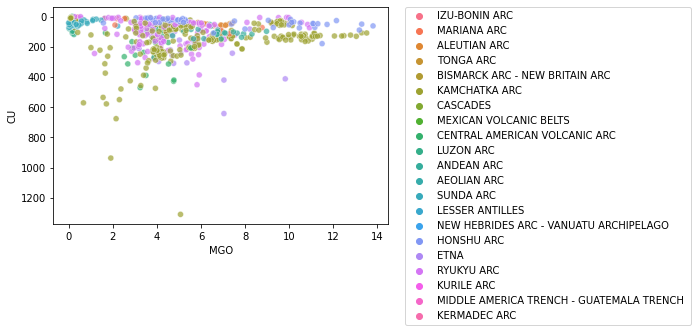

In [155]:
sns.scatterplot(x=mi_f4['MGO'], y=mi_f4['CU'], hue=mi_f4['arc_name'], alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


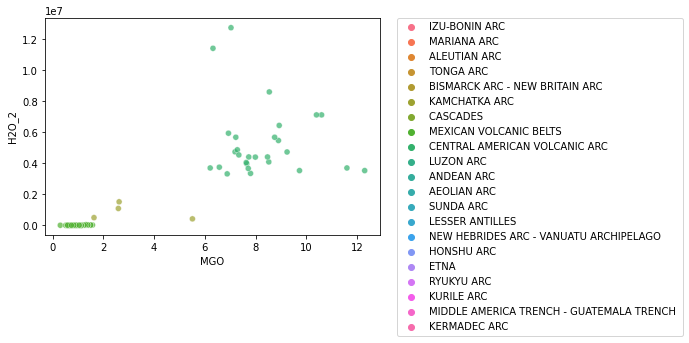

In [156]:
x = mi_f4['MGO']
y = mi_f4['H2O_2']

sns.scatterplot(x=x, y=y, hue=mi_f4['arc_name'], alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [157]:
mi_f4['H2O_1']=mi_f4['H2O_1'].astype('float')

<ipython-input-157-367c79221079>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mi_f4['H2O_1']=mi_f4['H2O_1'].astype('float')


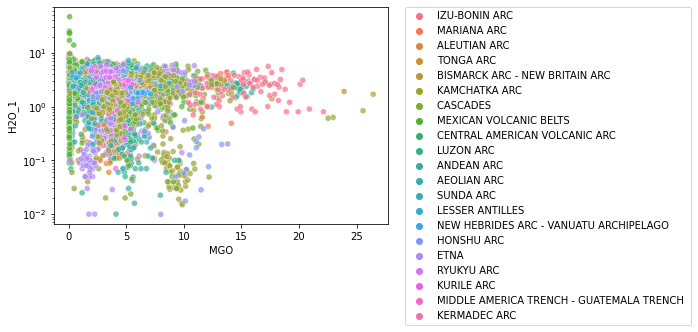

In [158]:
x = mi_f4['MGO']
y = mi_f4['H2O_1']

ax = sns.scatterplot(x=x, y=y, hue=mi_f4['arc_name'], alpha=0.7)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_yscale('log')

In [159]:
# locate localities with H2O above 6 wt%
mi_f4[mi_f4['H2O_1'] > 8][['H2O_1','arc_name','CITATION','loc2']]

,H2O_1,arc_name,CITATION,loc2
5293,8.7400000000,LUZON ARC,[9491] BORISOVA A. YU. (2006),LUZON ARC
7628,8.5400000000,LUZON ARC,[12621] BORISOVA A. YU. (2005),LUZON ARC
7629,8.5600000000,LUZON ARC,[12621] BORISOVA A. YU. (2005),LUZON ARC
7630,9.3100000000,LUZON ARC,[12621] BORISOVA A. YU. (2005),LUZON ARC
7635,8.2300000000,LUZON ARC,[12621] BORISOVA A. YU. (2005),LUZON ARC
7643,9.1400000000,LUZON ARC,[12621] BORISOVA A. YU. (2005),LUZON ARC
7645,8.5100000000,LUZON ARC,[12621] BORISOVA A. YU. (2005),LUZON ARC
7646,8.3800000000,LUZON ARC,[12621] BORISOVA A. YU. (2005),LUZON ARC
7673,8.7900000000,LUZON ARC,[12621] BORISOVA A. YU. (2005),LUZON ARC
7677,8.1200000000,LUZON ARC,[12621] BORISOVA A. YU. (2005),LUZON ARC


In [160]:
#drop ludicrous values - revise this because it excludes Ag and Au values
mi_f5 = mi_f4.copy()#[(mi_f4['H2O_1'] < 14) & (mi_f4['H2O_1'] > 0)]
# check data range
mi_f5['H2O_1'].max(),mi_f5['H2O_1'].min()


(47.04, -1.2464)

In [161]:
mi_f5['CU']=mi_f5['CU'].astype(float)

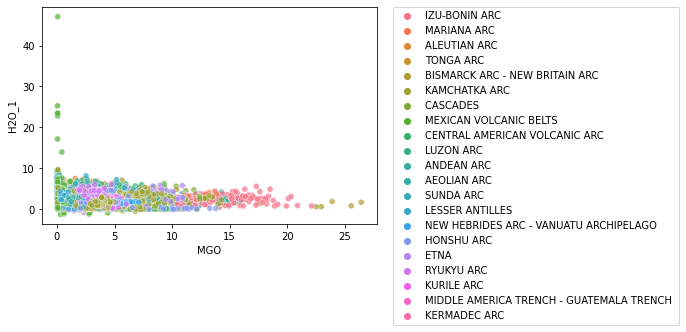

In [162]:
x = mi_f5['MGO']
y = mi_f5['H2O_1']

sns.scatterplot(x=x, y=y, hue=mi_f5['arc_name'], alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

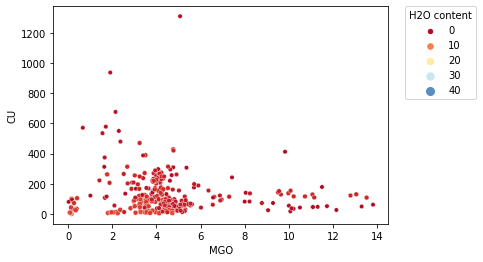

In [163]:
x = mi_f5['MGO']
y = mi_f5['CU']

sns.scatterplot(x=x, y=y, hue=mi_f5['H2O_1'], palette='RdYlBu', size=mi_f5['H2O_1'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='H2O content')

In [164]:
# apply dict to arcs only

mi_thick = {'IZU-BONIN ARC ':22, 'MARIANA ARC ':14.5,
       'TONGA ARC ':20, 'BISMARCK ARC - NEW BRITAIN ARC ':22.5, 'KAMCHATKA ARC ':24.6,
       'ANDEAN ARC ':50, 'SUNDA ARC ':25, 'LESSER ANTILLES ':24.7,
       'CENTRAL AMERICAN VOLCANIC ARC ':28, 'ETNA':25, 'LUZON ARC ':27.8,
       'AEOLIAN ARC ':24.9, 'RYUKYU ARC ':24.5, 'MEXICAN VOLCANIC BELTS ':30.3,
       'CASCADES ':38.8, 'KURILE ARC ':18.3, 'ALEUTIAN ARC ':37.5, 
       'NEW HEBRIDES ARC - VANUATU ARCHIPELAGO ':23, 'KERMADEC ARC ':15,
       'HONSHU ARC ':29.2}

# to amend:
# Sunda 20-30
# andean 40:70
# Etna 25km 
# Yasur versus central Vanuatu arc

In [165]:
mi_f5.loc[:,'thicks_km'] = mi_f5['arc_name'].map(mi_thick)

(-20.0, 600.0)

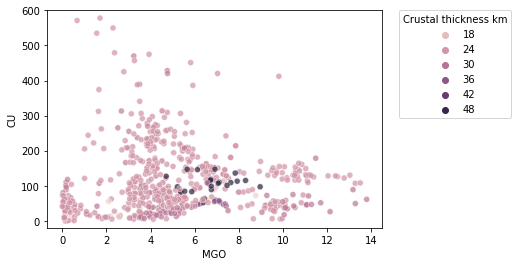

In [166]:
ax = sns.scatterplot(x=mi_f5['MGO'], y=mi_f5['CU'], hue=mi_f5['thicks_km'], alpha=0.7)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Crustal thickness km')
#ax.set_yscale('log')
ax.set_ylim(-20,600)

In [167]:
mi_f5['AUPPB'].unique()

array([nan, 6.2, 4.7, 7.2, 8.7, 4.3, 3.9, 3.2, 3.3])

In [168]:
mi_f5['Cu/Ag'] = mi_f5['CU'].div(mi_f5['AG'])
mi_f5['Cu/Ag'].astype('float')
mi_f5['AG'].unique()

mi_f5['Cu/Au'] = mi_f5['CU'].div(0.001*mi_f5['AUPPB'])
mi_f5['Cu/Au'].astype('float')
mi_f5['Cu/Au'].unique()

array([           nan, 30806.4516129 , 47446.80851064, 37083.33333333,
       19885.05747126, 41860.46511628, 40769.23076923, 35625.        ,
       33939.39393939])

In [169]:
#export melt inclusions data filtered to stage 5
mi_f5.to_csv('../FullModel/filtered/mi_f5.csv')

Examine the density distribution of the data and the bias of sample location.

Naturally, for the locations that have been sampled extensively, our data will likely skew towards these values, returning an innacurate statistic.


In [170]:
# plot density distributions of cumulative data and then aplit by arc_name

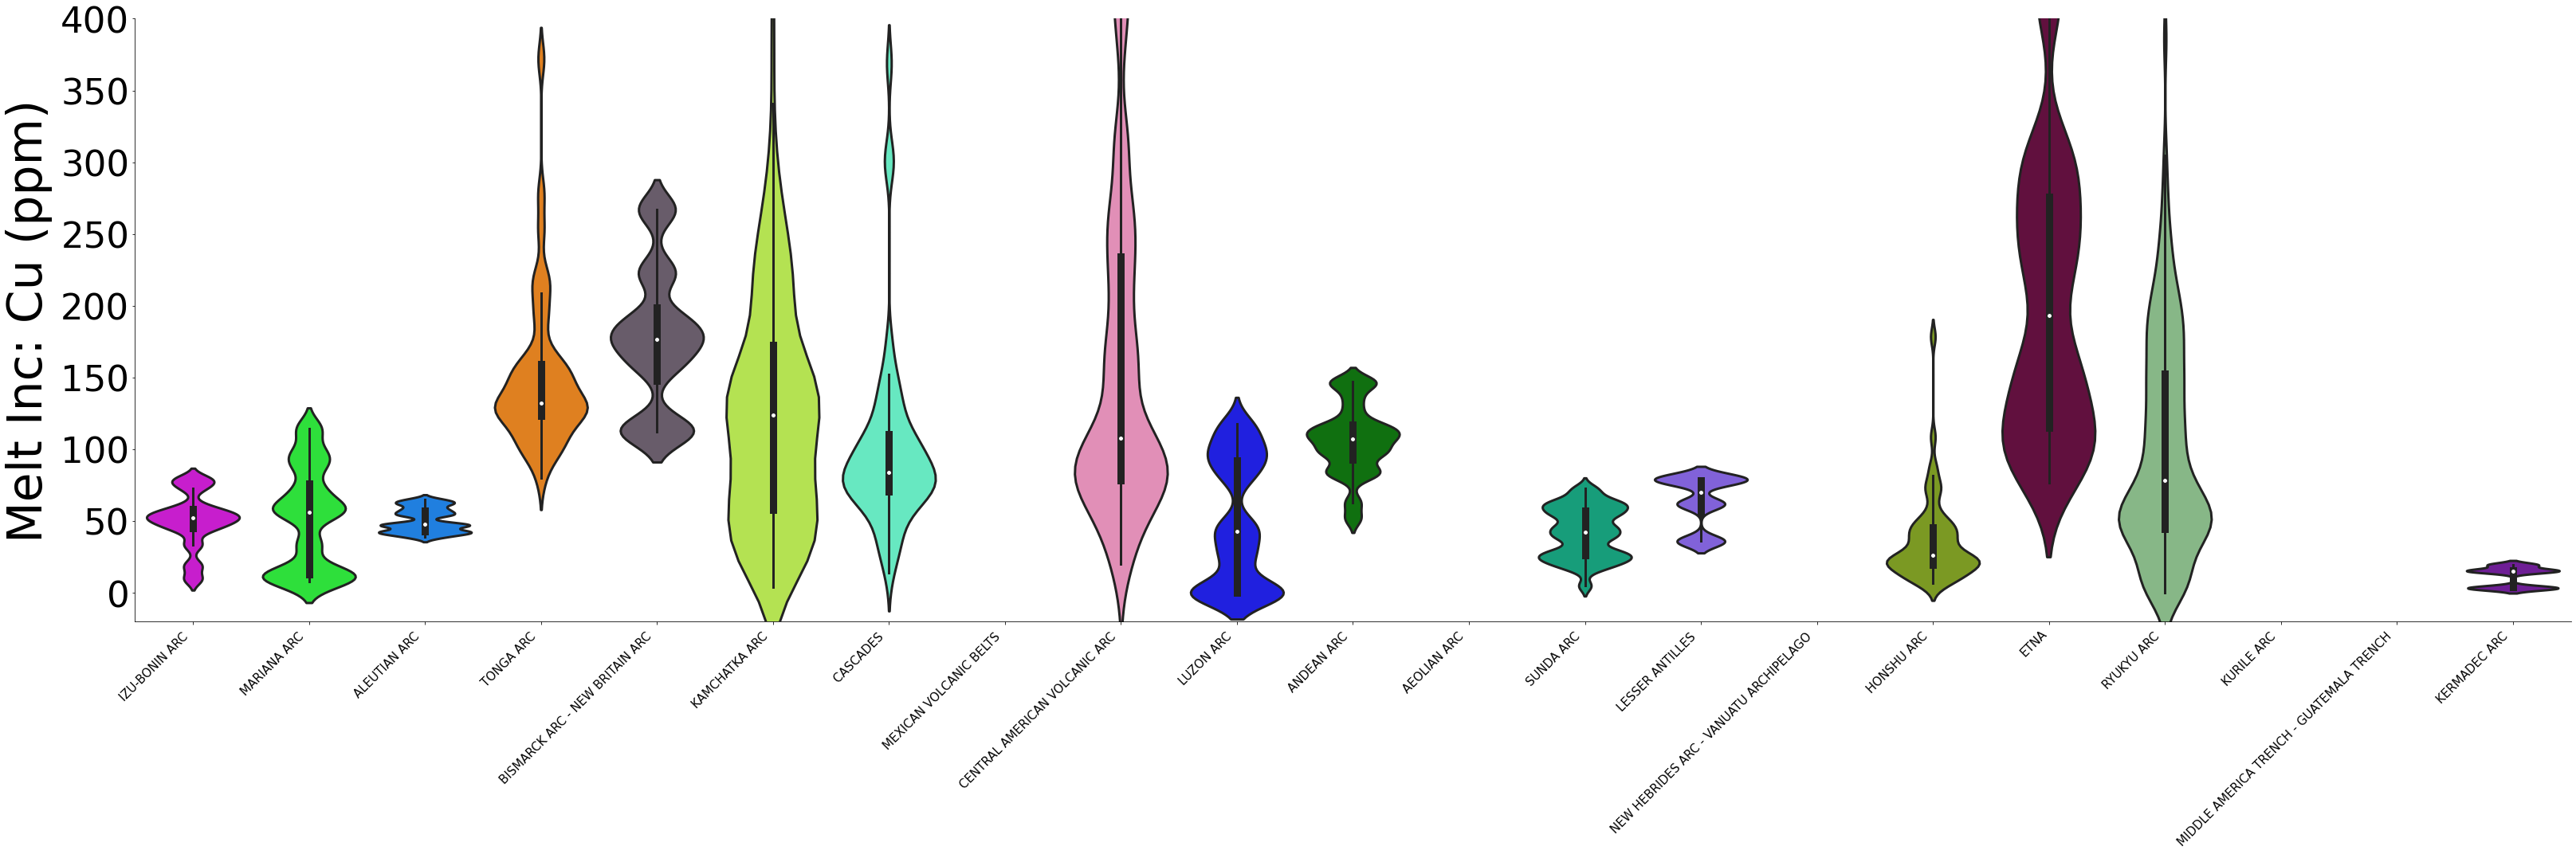

In [171]:
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 60,
        }

import distinctipy
uniq = mi_f5['arc_name'].unique()
scalarMap2 = dict(zip(uniq, distinctipy.get_colors(32)))

g = sns.catplot(x = 'arc_name', y = 'CU', data = mi_f5,scale = 'width', bw = 0.2,linewidth=3, kind ='violin', height = 15, aspect = 3,palette = scalarMap2) 

plt.xlabel("")
plt.ylabel("Melt Inc: Cu (ppm)", fontdict = font, labelpad = 10)
plt.xticks(fontsize = 15, rotation = 45, horizontalalignment='right', family = 'sans-serif')
plt.yticks(fontsize = 45, rotation = 0, family = 'sans-serif')
plt.ylim(-20,400)

plt.close(2)
plt.close(3)

plt.tight_layout()

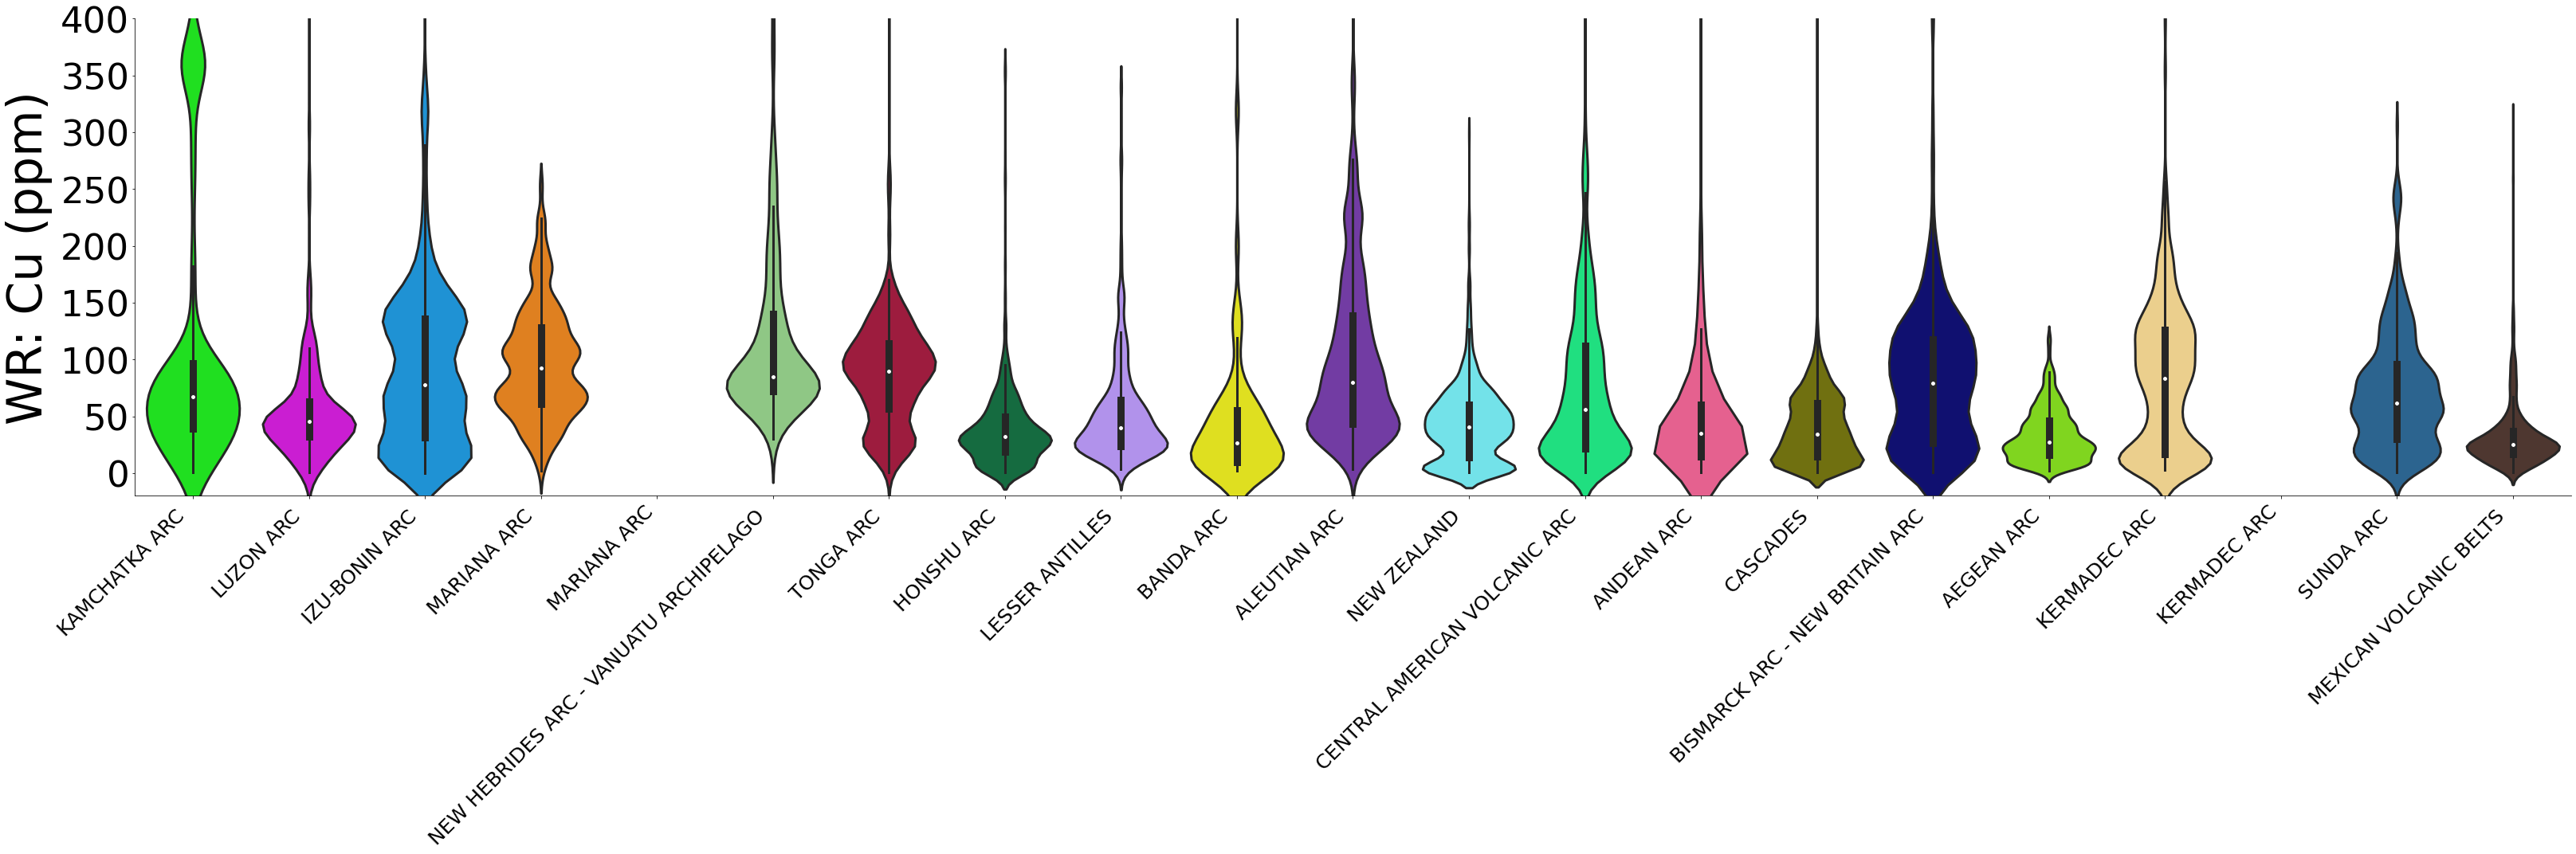

In [172]:
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 60,
        }

import distinctipy
uniq = all_f2['arc_name'].unique()
scalarMap2 = dict(zip(uniq, distinctipy.get_colors(32)))

g = sns.catplot(x = 'arc_name', y = 'CU_ppm_na', data = all_f2,scale = 'width', bw = 0.2,linewidth=3, kind ='violin', height = 15, aspect = 3,palette = scalarMap2) 

plt.xlabel("")
plt.ylabel("WR: Cu (ppm)", fontdict = font, labelpad = 10)
plt.xticks(fontsize = 25, rotation = 45, horizontalalignment='right', family = 'sans-serif')
plt.yticks(fontsize = 45, rotation = 0, family = 'sans-serif')
plt.ylim(-20,400)

plt.close(2)
plt.close(3)

plt.tight_layout()

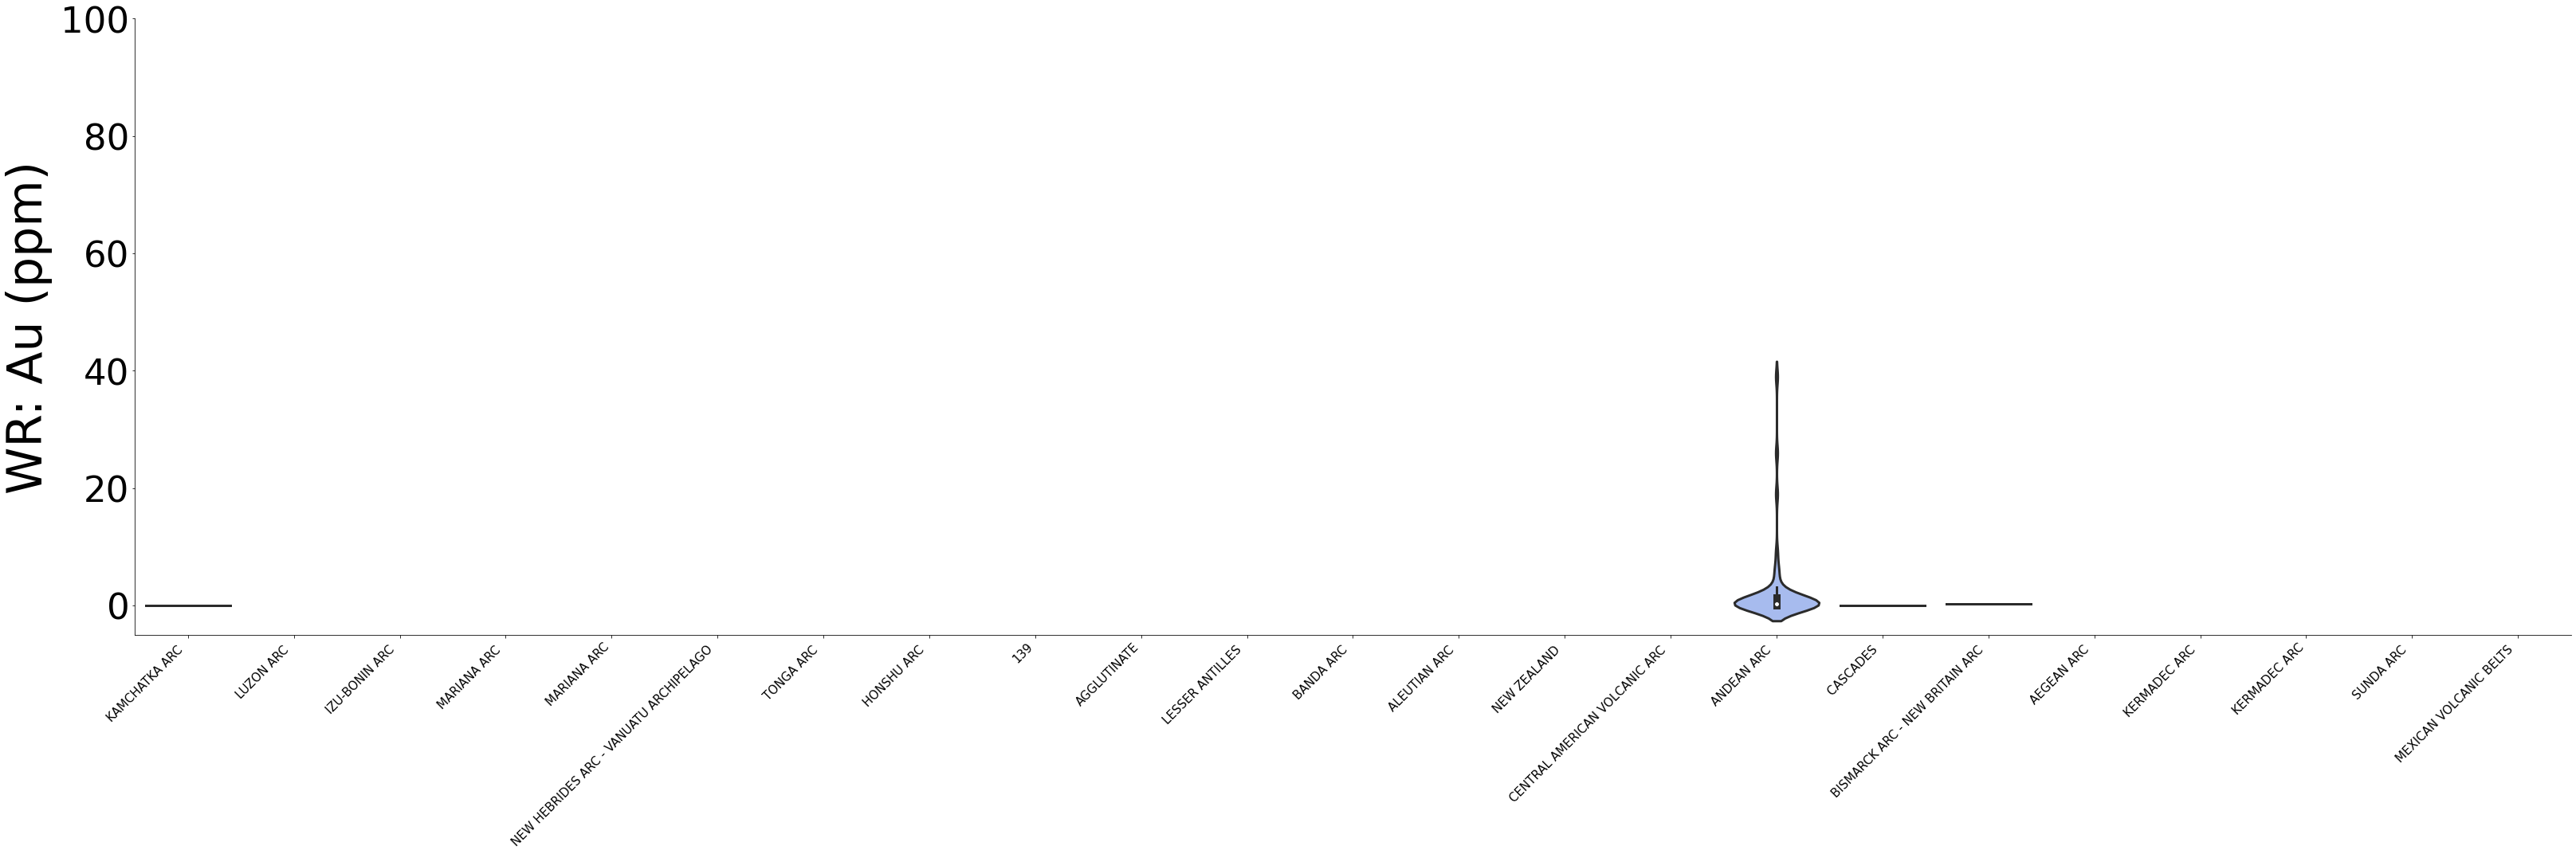

In [173]:
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 60,
        }

import distinctipy
uniq = dfall['arc_name'].unique()
scalarMap2 = dict(zip(uniq, distinctipy.get_colors(32)))

g = sns.catplot(x = 'arc_name', y = 'AU_ppm', data = dfall,scale = 'width', bw = 0.2,linewidth=3, kind ='violin', height = 15, aspect = 3,palette = scalarMap2) 

plt.xlabel("")
plt.ylabel("WR: Au (ppm)", fontdict = font, labelpad = 10)
plt.xticks(fontsize = 15, rotation = 45, horizontalalignment='right', family = 'sans-serif')
plt.yticks(fontsize = 45, rotation = 0, family = 'sans-serif')
plt.ylim(-5,100)

plt.close(2)
plt.close(3)

plt.tight_layout()

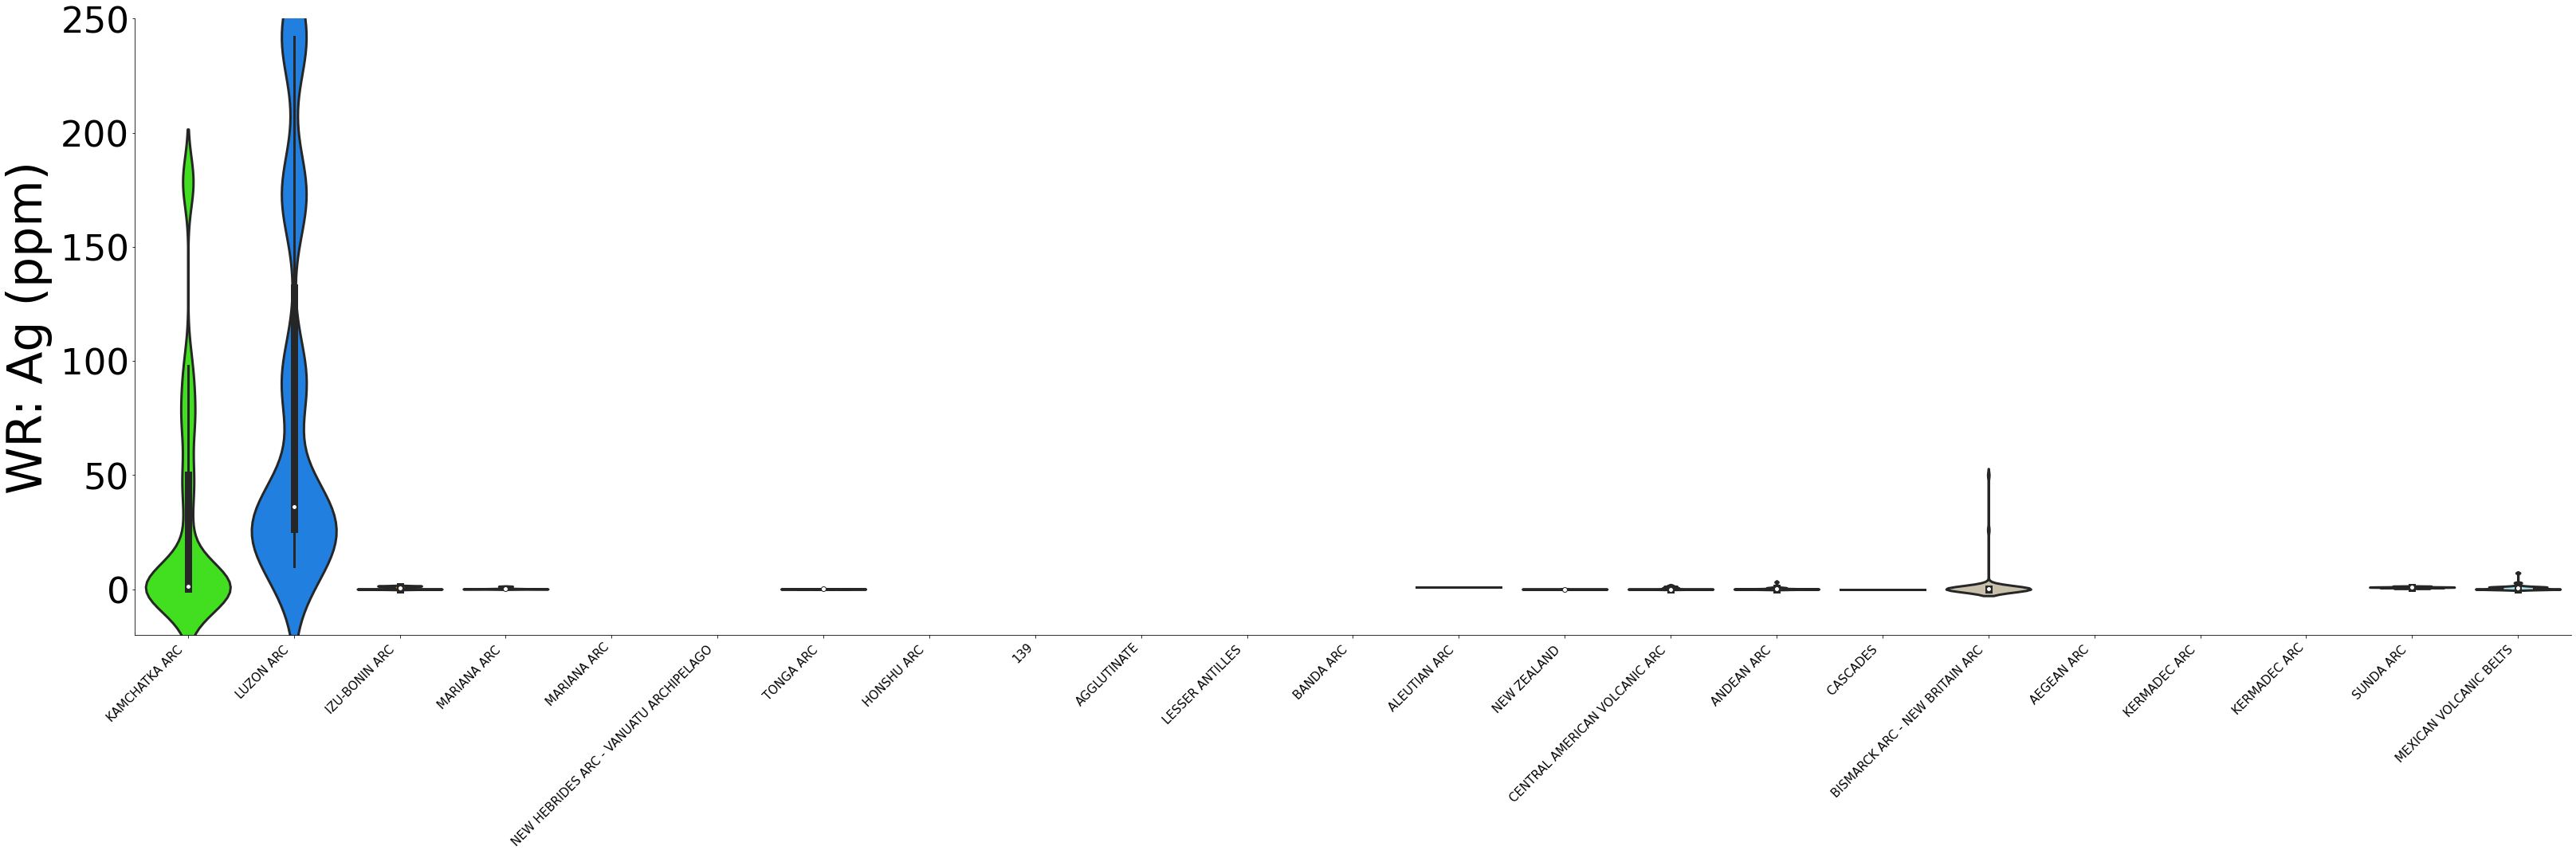

In [174]:
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 60,
        }

import distinctipy
uniq = dfall['arc_name'].unique()
scalarMap2 = dict(zip(uniq, distinctipy.get_colors(32)))

g = sns.catplot(x = 'arc_name', y = 'AG_ppm', data = dfall,scale = 'width', bw = 0.2,linewidth=3, kind ='violin', height = 15, aspect = 3,palette = scalarMap2) 

plt.xlabel("")
plt.ylabel("WR: Ag (ppm)", fontdict = font, labelpad = 10)
plt.xticks(fontsize = 15, rotation = 45, horizontalalignment='right', family = 'sans-serif')
plt.yticks(fontsize = 45, rotation = 0, family = 'sans-serif')
plt.ylim(-20,250)

plt.close(2)
plt.close(3)

plt.tight_layout()

In [175]:
coldict = dict(zip(mi_f5['arc_name'].unique(), distinctipy.get_colors(32)))

In [176]:
# statistics based on arc name
Cu_gmean = mi_f5.groupby(['arc_name'])['CU'].mean()
#Cu_gmode = mi_f5.groupby(['arc_name'])['CU'].agg(pd.Series.mode)
Cu_gmed = mi_f5.groupby(['arc_name'])['CU'].median()
Cu_gmean

arc_name
AEOLIAN ARC                                            NaN
ALEUTIAN ARC                                 50.8125000000
ANDEAN ARC                                  106.2782608696
BISMARCK ARC - NEW BRITAIN ARC              177.3750000000
CASCADES                                    101.7770013302
CENTRAL AMERICAN VOLCANIC ARC               163.7855460192
ETNA                                        218.2307692308
HONSHU ARC                                   36.7311320755
IZU-BONIN ARC                                50.6465038030
KAMCHATKA ARC                               140.3794736802
KERMADEC ARC                                 11.4560000000
KURILE ARC                                             NaN
LESSER ANTILLES                              64.0000000000
LUZON ARC                                    49.0666666667
MARIANA ARC                                  52.1541666667
MEXICAN VOLCANIC BELTS                                 NaN
MIDDLE AMERICA TRENCH - GUATEMALA TRENCH       

In [177]:
# add columns for mean Cu per arc_name and total 

Cu_mean = mi_f5['CU'].mean()
Cu_mode= mi_f5['CU'].mode()
Cu_med= mi_f5['CU'].median()
Cu_mode, Cu_med, Cu_mean

(0   116.0000000000
 dtype: float64,
 90.9,
 115.46502048340413)

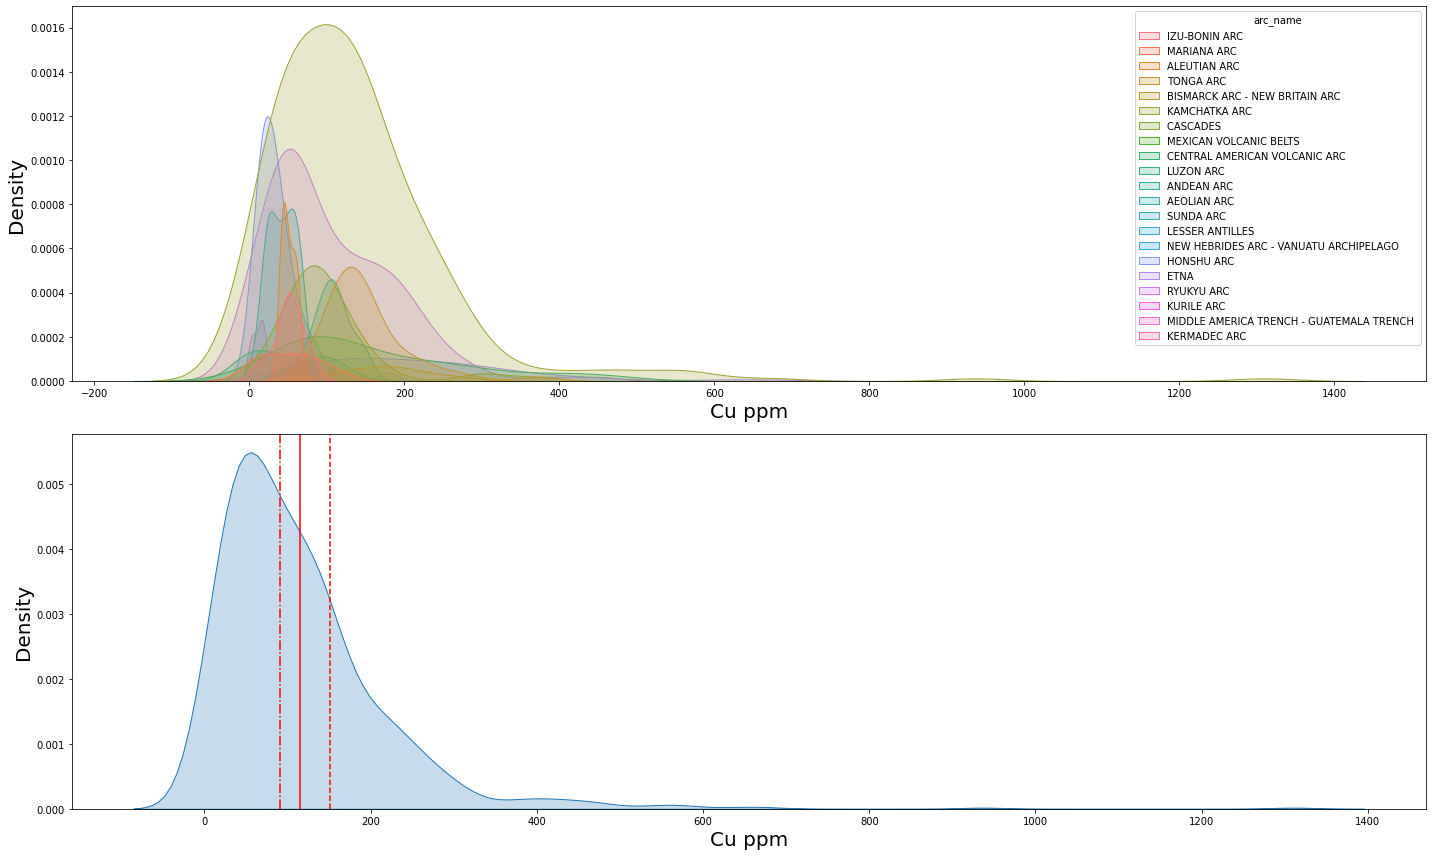

In [178]:
# melt inclusion data
fig, ax = plt.subplots(2,1,figsize=(20,12))
sns.kdeplot(data=mi_f5, x='CU', hue='arc_name',fill=True, ax=ax[0])
sns.kdeplot(data=mi_f5, x='CU', fill=True, ax=ax[1])


ax[0].set_xlabel('Cu ppm', fontsize=20)
ax[1].set_xlabel('Cu ppm', fontsize=20)

ax[0].set_ylabel('Density', fontsize=20)
ax[1].set_ylabel('Density', fontsize=20)

ax[1].axvline(Cu_mean, c='red')
ax[1].axvline(151, c='red', linestyle='--')
ax[1].axvline(Cu_med, c='red',linestyle='-.')

fig.tight_layout()


In [179]:
mi_f5.groupby(['arc_name'])['CU'].count()

arc_name
AEOLIAN ARC                                    0
ALEUTIAN ARC                                  16
ANDEAN ARC                                    23
BISMARCK ARC - NEW BRITAIN ARC                 8
CASCADES                                      48
CENTRAL AMERICAN VOLCANIC ARC                 40
ETNA                                          26
HONSHU ARC                                    53
IZU-BONIN ARC                                 15
KAMCHATKA ARC                                292
KERMADEC ARC                                   5
KURILE ARC                                     0
LESSER ANTILLES                                4
LUZON ARC                                     15
MARIANA ARC                                   12
MEXICAN VOLCANIC BELTS                         0
MIDDLE AMERICA TRENCH - GUATEMALA TRENCH       0
NEW HEBRIDES ARC - VANUATU ARCHIPELAGO         0
RYUKYU ARC                                   142
SUNDA ARC                                     36
TONGA ARC  

We can see clearly from these density plots and counts that Kamchatka (n=146) and Honshu (n=45) are dominating the skew here.

In [180]:
# ANOVA by crustal thickness content

mod = ols('CU ~ thicks_km', data = mi_f5).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
pd.options.display.float_format = '{:.10f}'.format
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
aov_table['EtaSq'] = [esq_sm, 'NaN']

In [181]:
aov_table.to_csv('../FullModel/filtered/ANOVA_mi_thicks.csv')

In [182]:
aov_table

,sum_sq,df,F,PR(>F),EtaSq
thicks_km,45995.3341029121,1.0000000000,3.9722865637,0.0466051401,0.0050993939
Residual,8973769.4796402100,775.0000000000,NaN,NaN,NaN


P > 0.05 i.e. differences between groups are not statistically significant enough to explain 
n^2 term is < 3% i.e. overall small effect

In [183]:
# ANOVA by H2O content

mod = ols('CU ~ H2O_1', data = mi_f5).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
pd.options.display.float_format = '{:.10f}'.format
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
aov_table['EtaSq'] = [esq_sm, 'NaN']

In [184]:
aov_table.to_csv('../FullModel/filtered/ANOVA_mi_H2O.csv')

In [185]:
aov_table

,sum_sq,df,F,PR(>F),EtaSq
H2O_1,512462.8509951379,1.0000000000,33.0645162606,0.0000000188,0.0828550646
Residual,5672588.7651291480,366.0000000000,NaN,NaN,NaN


P << 0.05 i.e. significant differences between treatments of H2O

EtaSq > 3%

To take these results further requires POST-HOC testing

allows examination of which groups significantly differ from eachother

Tukey: https://www.pythonfordatascience.org/anova-python/

### Preliminary plotting of whole rock and MI data

In [186]:
from cmcrameri import cm

### whole rock datasets first

First we need to normalise the range of H2O between 0 and 14 wt% since anything beyond those limits is not good data.

In [187]:
# check how many h2o columns i have and do these coulmns have pairs 
# with Cu and Ag/Au data?

all_f2[['H2O', 'H2OP', 'H2OM','H2O_ppm','CU_ppm','AG_ppm','AU_ppm', 'AU_ppb','CE_ppm']]
all_f2['H2O'].max(), all_f2['H2O'].min()
all_f2['H2OP'].max(), all_f2['H2OP'].min()
all_f2['H2OM'].max(), all_f2['H2OM'].min()

#there are no instances where Ag and H2O have been measured so cannot screen Cu/Ag by water content. 

(14.48, -0.77)

In [188]:
# filter for all instance that have Cu/Ag calculation:

all_f3 = all_f2.loc[(all_f2['Cu/Ag'] > 0)]
print(all_f2['CE_ppm'].max(),all_f2['CE_ppm'].min())
print(all_f2.shape, all_f3.shape)
print(all_f3['CE_ppm'].max(),all_f3['CE_ppm'].min())
print(all_f3['H2OM'].max(),all_f3['H2OM'].min())

550.0 0.0
(77690, 172) (92, 172)
122.0 1.8
nan nan


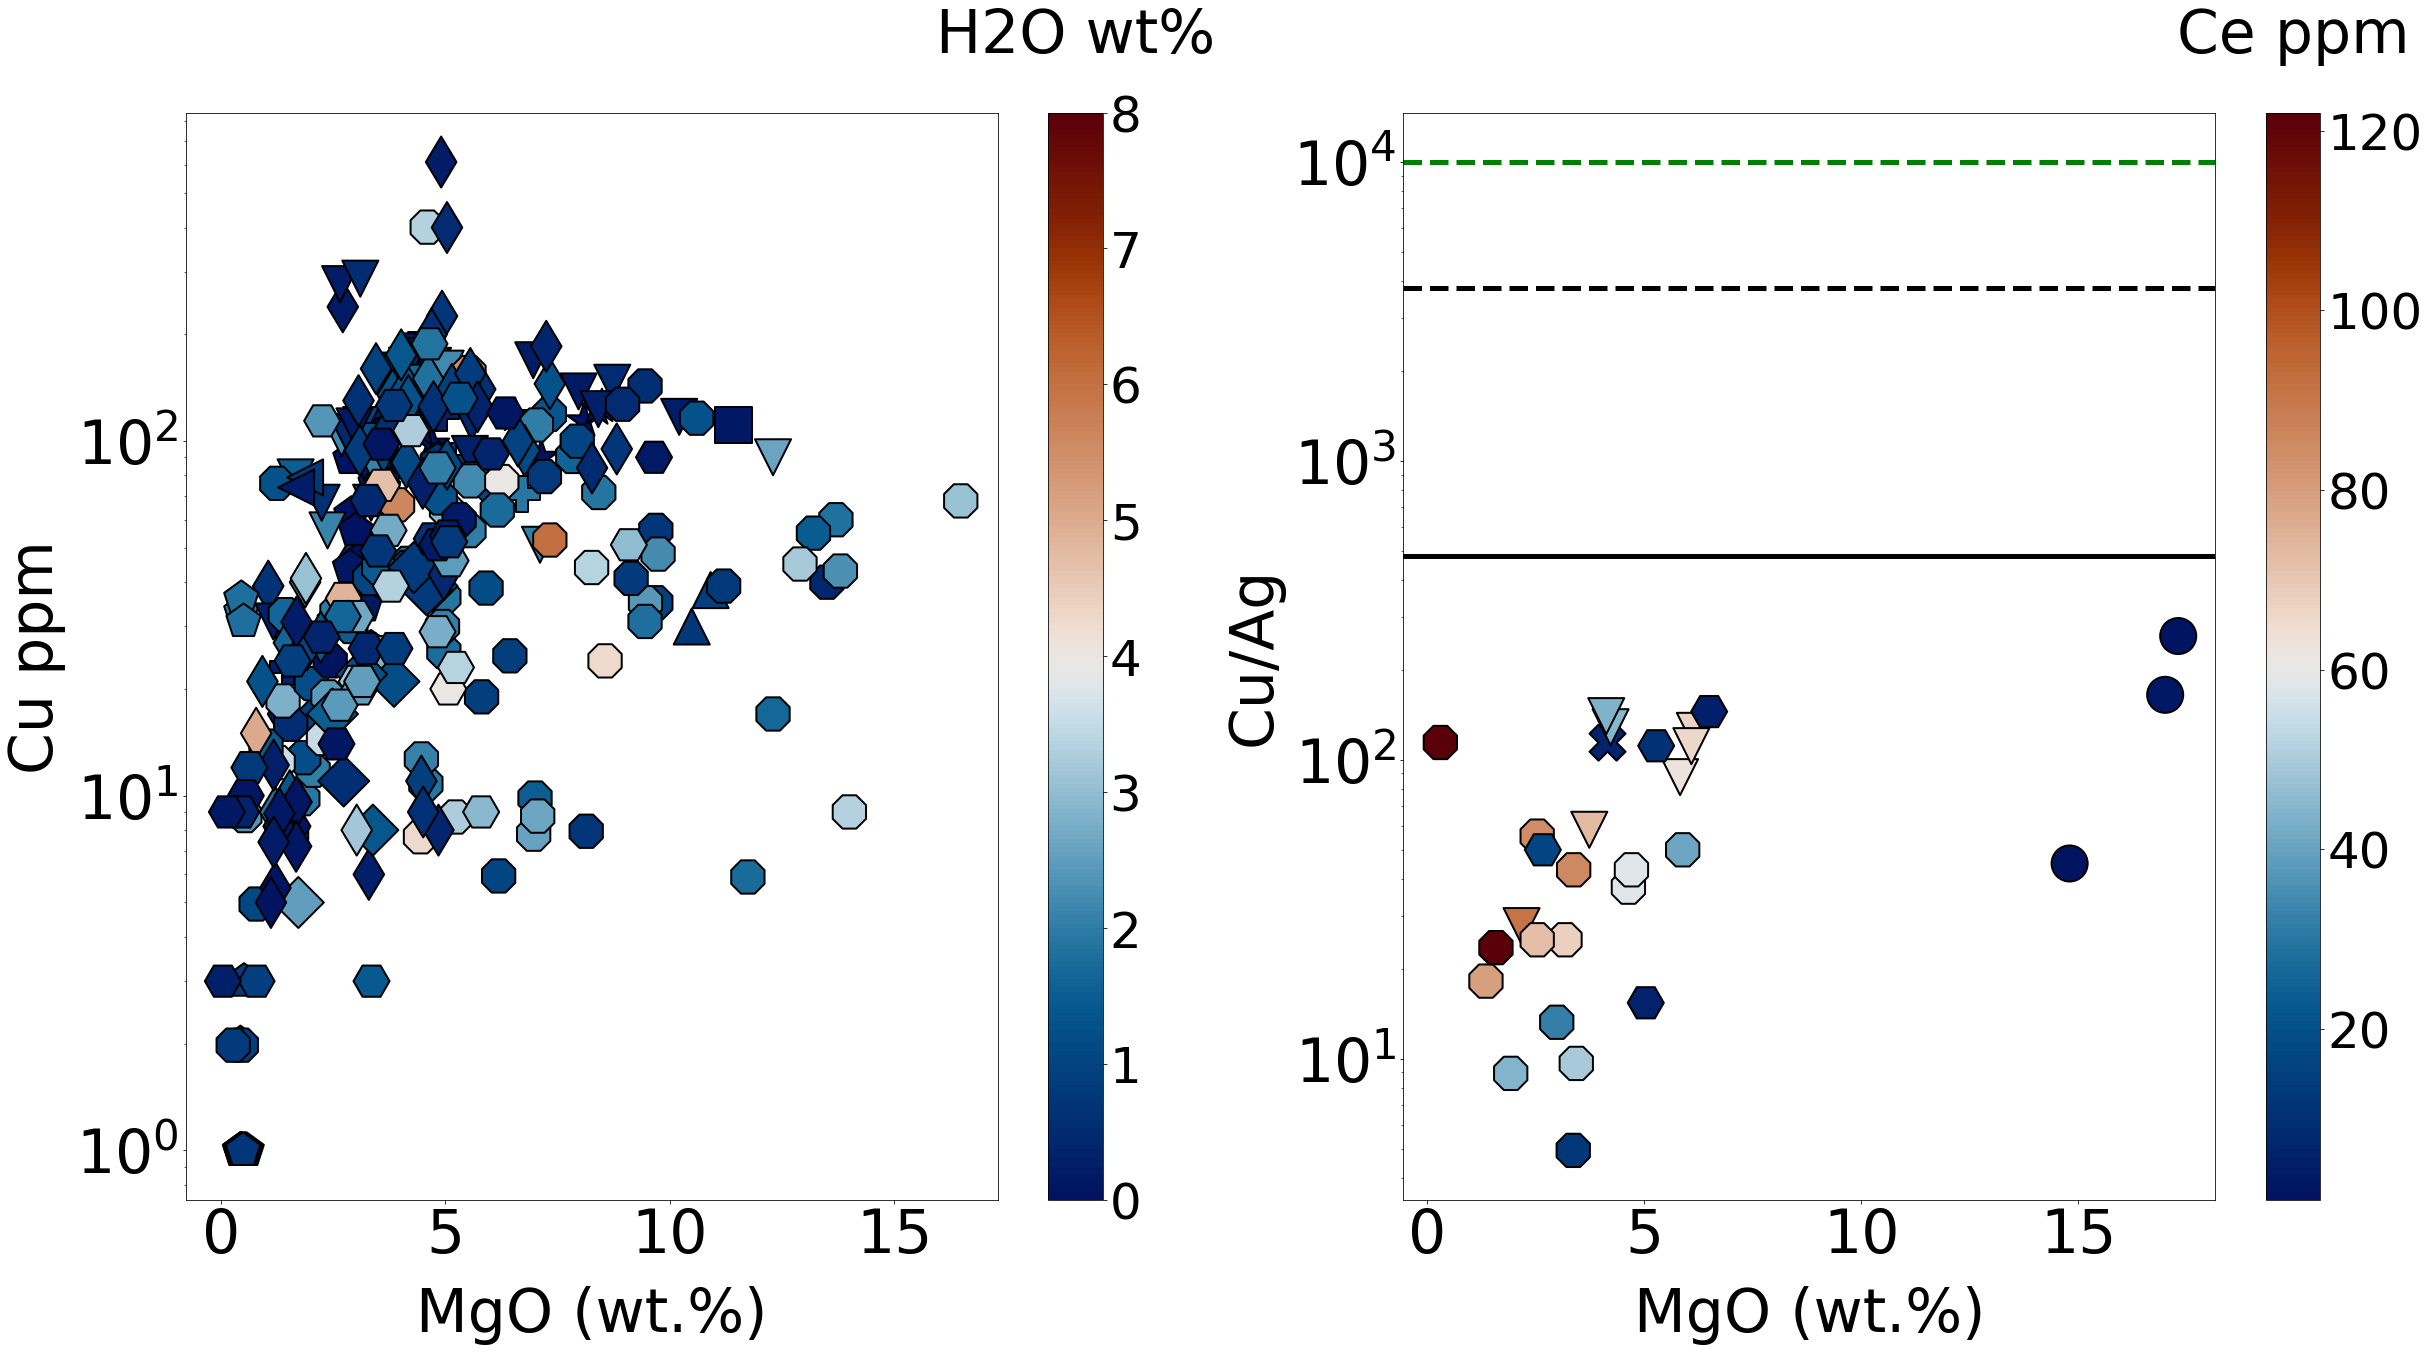

In [189]:
import matplotlib as mpl

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(40, 20), sharey = False)

plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 60,
       }

ax1.set_yscale('log')
ax2.set_yscale('log')

mkers = {'KAMCHATKA ARC ':'o', 'LUZON ARC ':'d', 'IZU-BONIN ARC ':'>', 'MARIANA ARC ':'s',
       'MARIANA ARC':'s', 'NEW HEBRIDES ARC - VANUATU ARCHIPELAGO ':'*',
       'TONGA ARC ':'P', 'HONSHU ARC ':'^', 'LESSER ANTILLES ':'o', 'BANDA ARC ':'X',
       'ALEUTIAN ARC ':'X', 'NEW ZEALAND ':'p', 'CENTRAL AMERICAN VOLCANIC ARC ':'v',
       'ANDEAN ARC ':'8', 'CASCADES ':'>', 'BISMARCK ARC - NEW BRITAIN ARC ':'.',
       'AEGEAN ARC ':'D', 'KERMADEC ARC ':'d', 'KERMADEC ARC':'d', 'SUNDA ARC ':'H',
       'MEXICAN VOLCANIC BELTS ':'<'}

uniq = all_f2['arc_name'].unique()

d = all_f2['MGO']
y = all_f2['CU_ppm_na']
y2 = all_f2['Cu/Ag']
z1 = all_f2['H2O']
z2 = all_f2['CE_ppm']

selected=['ANDEAN ARC ', 'TONGA ARC ', 'NEW HEBRIDES ARC - VANUATU ARCHIPELAGO ', 'SUNDA ARC ', 'CENTRAL AMERICAN VOLCANIC ARC ', 
          'MARIANA ARC', 'NEW ZEALAND ', 'MEXICAN VOLCANIC BELTS ','HONSHU ARC ']

vmin2 = 1
vmax2 = 122
norm2 = mpl.colors.Normalize(vmin=vmin2, vmax=vmax2)

vmin1 = 0
vmax1 = 8
norm1 = mpl.colors.Normalize(vmin=vmin1, vmax=vmax1)

for i in range(len(uniq)):
    indx = all_f2['arc_name'] == uniq[i]
    #Only plot legend items that appear in graph
    if uniq[i] in selected:
        mylabel = uniq[i]
    else:
        mylabel = None
        
    zplot1 = ax1.scatter(d[indx], y[indx], c = z1[indx], cmap = cm.vik, 
            s = 1300, edgecolor = 'k', linewidth = 2, marker = mkers[uniq[i]],
            label=mylabel)
    zplot1.set_norm(norm1)
    zplot2 = ax2.scatter(d[indx], y2[indx], c = z2[indx], cmap = cm.vik,
            s = 1300, edgecolor = 'k', linewidth = 2, marker = mkers[uniq[i]],
            label=mylabel)
    zplot2.set_norm(norm2)
    
cbar1 = plt.colorbar(zplot1, ax = ax1)
cbar2 = plt.colorbar(zplot2, ax = ax2)

#Labels and positioning
ax1.set_xlabel("MgO (wt.%)", fontdict=font, labelpad = 20)
ax1.set_ylabel("Cu ppm", fontdict = font, labelpad = 10)
#ax1.set_xlim([0, 10])
#ax1.set_ylim([8, 100000])
ax1.tick_params(axis="x", labelsize=60)
cbar1.ax.set_title("H2O wt%", fontdict=font, pad= 60)
cbar1.ax.tick_params(labelsize=50)
cbar1.outline.set_edgecolor('black')
ax1.tick_params(axis="y", labelsize=60)


ax2.set_xlabel("MgO (wt.%)", fontdict=font, labelpad = 20)
ax2.set_ylabel("Cu/Ag", fontdict = font, labelpad = 10)
#ax2.set_xlim([0, 10])
#ax2.set_ylim([8, 100000])
ax2.tick_params(axis="x", labelsize=60)
ax2.tick_params(axis="y", labelsize=60)
#ax1.legend(loc = 'upper left', frameon = True, fontsize = 30, ncol = 1,title = 'Arcs', title_fontsize = 50)

cbar2.ax.set_title("Ce ppm", fontdict=font, pad= 60)
cbar2.ax.tick_params(labelsize=50)
cbar2.outline.set_edgecolor('black')


ax2.axhline(10000, color="g", linestyle="--", linewidth=5, label = 'Sulphide Cumulate', zorder =0)
ax2.axhline(3800, color="k", linestyle="--", linewidth=5, label = 'MORB', zorder = 0)
#ax1.axhline(500, color="blue", linestyle="-", linewidth=3, label = 'Upper CC')
ax2.axhline(480, color="k", linestyle="-", linewidth=5, label = 'Bulk CC', zorder =0)
#ax1.axhline(400, color="red", linestyle="-", linewidth=3, label = 'Lower CC')

labels = ["Cumulate", "MORB", "Bulk CC"]
handles, _ = ax1.get_legend_handles_labels()
#ax2.legend(handles = handles, labels = labels, loc = 'upper right', 
 #          title = 'Cu/Ag Reservoirs (Jenner 2017)',
  #         title_fontsize = 40, frameon = True, fontsize = 40, ncol = 1)

### Melt Inclusion Datasets

In [193]:
mi_f5[['H2O_1', 'H2O_2', 'H2O_3','H2O_4','CU', 'AU', 'AUPPB',  'CE', 'AG']].head()

,H2O_1,H2O_2,H2O_3,H2O_4,CU,AU,AUPPB,CE,AG
674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
mi_f6 = mi_f5.loc[(mi_f5['Cu/Ag'] > 0)]
print(mi_f5['CE'].count(),mi_f6['CE'].count()) #no Ce data if we calc cu/ag
print(mi_f5['H2O_1'].count(),mi_f6['H2O_1'].count())
print(mi_f5['H2O_2'].count(),mi_f6['H2O_2'].count())
print(mi_f5['H2O_3'].count(),mi_f6['H2O_3'].count())
print(mi_f5['H2O_4'].count(),mi_f6['H2O_4'].count())
print(mi_f5['Cu/Ag'].count())

2759 0
5647 0
113 0
6 0
23 0
0
